# Credit card fraud classification.

This notebook delves into the credit card fraud dataset found at https://www.kaggle.com/mlg-ulb/creditcardfraud. I have taken inspiration from various kernels and previous projects of my own to produce this slightly different take on the problem provided.

## Contents:
### 1: Data preparation and interpretation
### 2: Data preprocessing
### 3: Exploratory data analysis
### 4: Machine learning classification
### 5: Neural network classification
### 6: Conclusion


### 1: Data preparation and interpretation:

Here we will read in the data, load any libraries we plan to make use of, and attempt to understand the contents of the dataset.

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Data Preprocessing imports
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
#Exploratory Data Analysis imports
import time
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
#Machine learning classification
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
#Neural Network imports
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

data = pd.read_csv('creditcard.csv')
data.head()

Using TensorFlow backend.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Note that the data has been dimensionaly reduced, most likely in order to protect the data provided by the users. This means our knowledge of the data will be less untuitive and solely stastically grounded for this problem.

In [118]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [119]:
print(data.shape)
print("Non-Fraud count: ", data['Class'].value_counts()[0])
print("Fraud count: ", data['Class'].value_counts()[1])

data.columns

(284807, 31)
Non-Fraud count:  284315
Fraud count:  492


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

We have a large dataset, but it is massively imbalanced, as you would expect for this type of data.

In [120]:
data.isnull().sum().max()

0

There are no null values so we can proceed without needing to estimate or remove data.

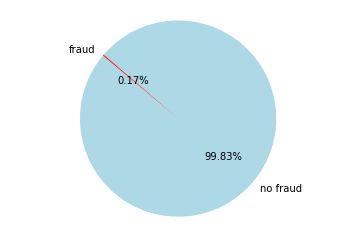

In [121]:
data['Class'].value_counts()
labels = 'no fraud', 'fraud'
sizes = [data['Class'].value_counts()[0], data['Class'].value_counts()[1]]
colors = ['lightblue', 'red']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.show()

With such a small proportion of fraud cases we will need to try a couple different methods to balance the data before training the model.

### 2: Data preprocessing

Here we will preprocess the data, normalizing values and use a few different methods to balance the dataset.

Firstly we can normalize columns 'amount' and 'time', using the RobustScaler which is based on percentiles will reduce the effect of outliers in the data.

In [122]:
rob_scaler = RobustScaler()
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

Check to confirm that amount and time are scaled and stored.

In [123]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


Now we should deal with the imbalance in the dataset. We will look at 2 methods and from here onwards run tests on both datasets produced to understand the benefits of the different methods.

The first method is to oversample the fraud data, because of the extreme imbalance we will have to concatenate a smaller number of non-fraudulent data for equal outcome.

We will duplicate each fraudulent row 10 times, and take an equal number of non fraudulent data.

(9840, 31)


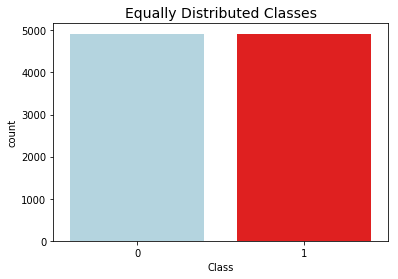

In [124]:
data = data.sample(frac=1)

fraud_data = data.loc[data['Class'] == 1]

fraud_data_duplicated = pd.concat([fraud_data]*10, ignore_index=True)

non_fraud_data = data.loc[data['Class'] == 0][:4920]

concat_data = pd.concat([fraud_data_duplicated, non_fraud_data])

equal_dup_data = concat_data.sample(frac=1, random_state=42)

print(equal_dup_data.shape)

sns.countplot('Class', data=equal_dup_data, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

So we've balanced the dataset at a massive loss to the amount of data, Next we can try using the SMOTE algorithm to produce more fraudulent class data.

In [125]:
labels = data['Class']
features = data.drop('Class', axis=1)

sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_sample(features, labels)

Now we simply have to stick the labels and the features back together.

(568630, 30)
(568630,)
(568630, 31)


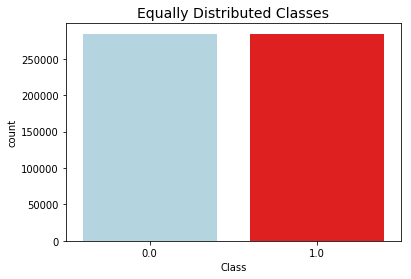

In [126]:
print(X_train_smote.shape)
print(y_train_smote.shape)

smote_data = pd.DataFrame(np.column_stack((X_train_smote, y_train_smote)))
smote_data.columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
                      'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
                      'V28', 'scaled_amount', 'scaled_time', 'Class']
scaled_amount = smote_data['scaled_amount']
scaled_time = smote_data['scaled_time']

smote_data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
smote_data.insert(29, 'scaled_amount', scaled_amount)
smote_data.insert(30, 'scaled_time', scaled_time)
print(smote_data.shape)


sns.countplot('Class', data=smote_data, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [127]:
#adding the 3 dataframes to a list
df_list = [data, equal_dup_data, smote_data]

Using SMOTE we now have equal weighting of outcomes, but now with a large dataset.

We can now look at the correlation between features and class outcome.

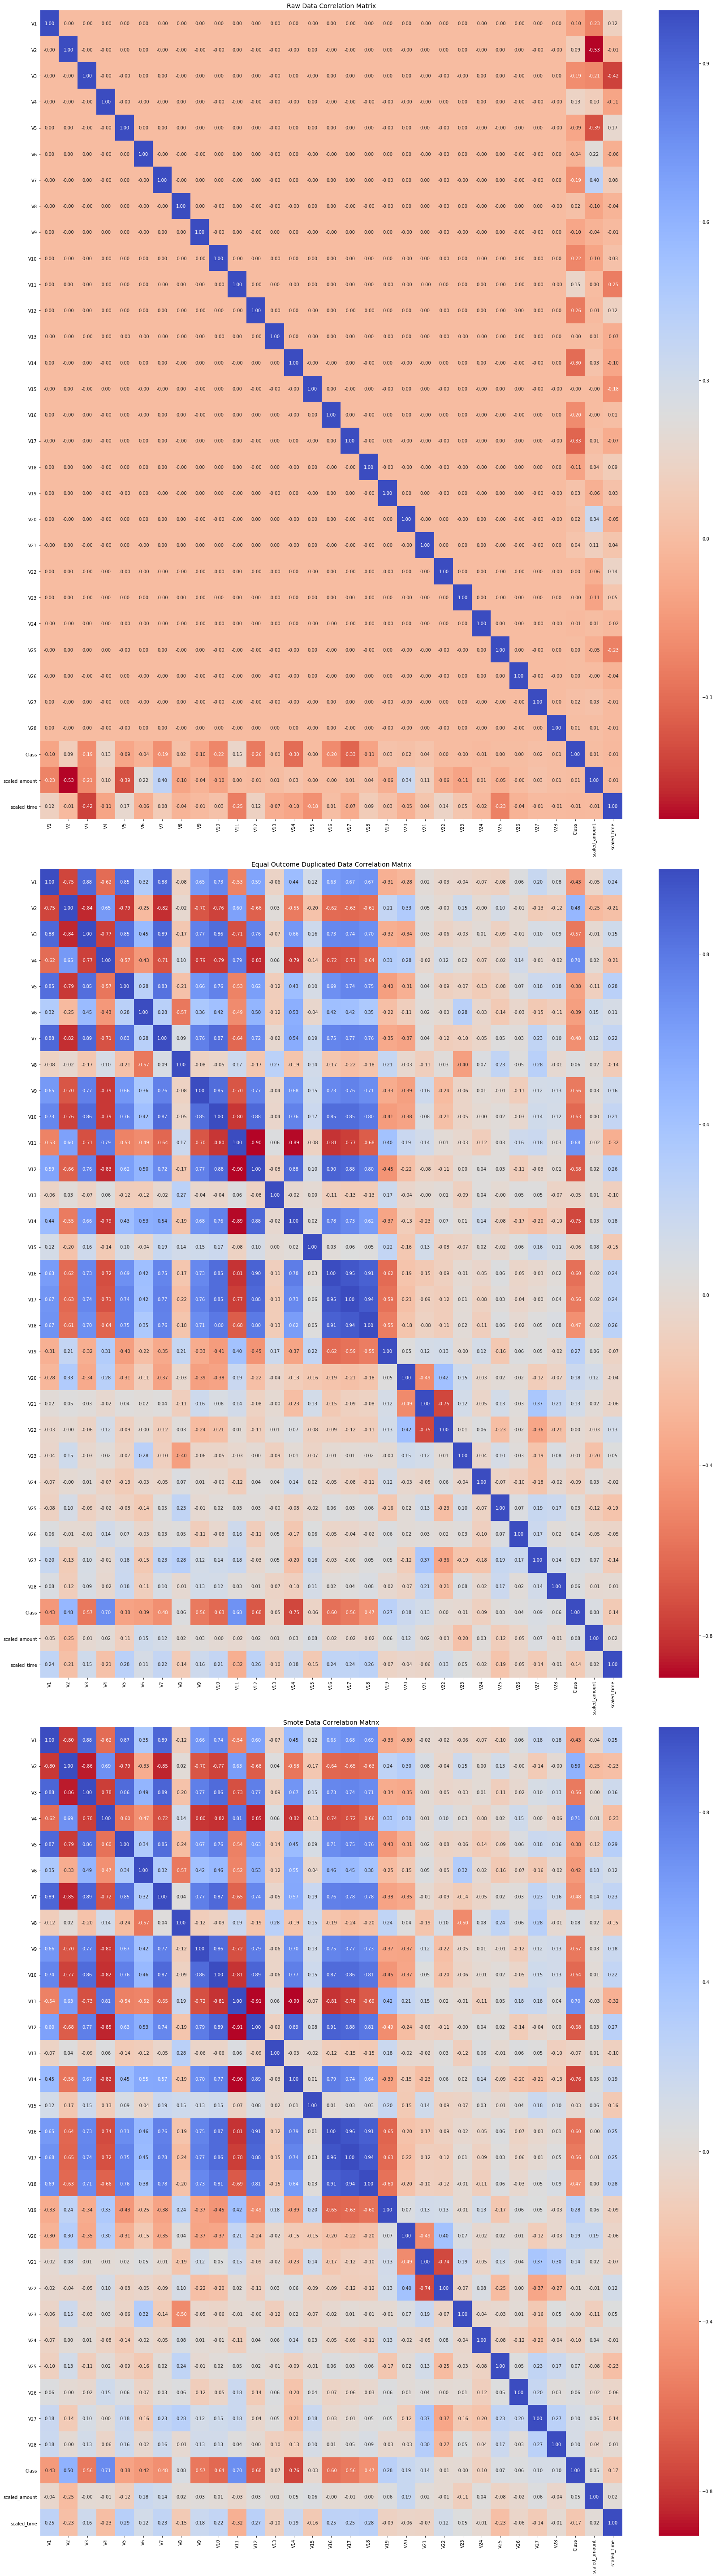

In [128]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(24,80))

corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot=True, fmt='.2f', annot_kws={'size':10}, ax=ax1)
ax1.set_title("Raw Data Correlation Matrix", fontsize=14)

equal_dup_corr = equal_dup_data.corr()
sns.heatmap(equal_dup_corr, cmap='coolwarm_r', annot=True, fmt='.2f', annot_kws={'size':10}, ax=ax2)
ax2.set_title('Equal Outcome Duplicated Data Correlation Matrix', fontsize=14)

smote_data_corr = smote_data.corr()
sns.heatmap(smote_data_corr, cmap='coolwarm_r', annot=True, fmt='.2f', annot_kws={'size':10}, ax=ax3)
ax3.set_title('Smote Data Correlation Matrix', fontsize=14)

plt.tight_layout()
plt.show()

Balancing the data has a massive effect on the correlation strength. Smote has produced some small reductions in correlation strength compared to the duplicated data but this may be a worthwhile cost for an increased dataset with a higher amount of generalisation to the data.

Now we can clean the datasets a bit by removing some of the outliers, because we have produced datasets with an equal outcome using boxplots will accurately depict outliers. We will focus on the most important features which are consistent among all the datasets; V1, V2, V3, V4, V5, V6, V7, V9, V10, V11, V12, V14, V16, V17, V18, V19

#### NOTE: This only produces a fairly small increase in accuracy in most models, therefore you can feel free to skip to chapter 3.

We can begin by focusing on the positive correlations:

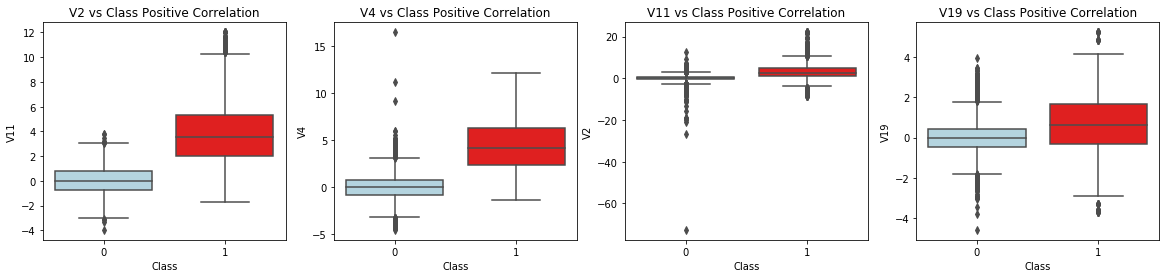

In [129]:
#Equal Outcome Duplicated Data
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V2", data=equal_dup_data, palette=colors, ax=axes[2])
axes[0].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=equal_dup_data, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V11", data=equal_dup_data, palette=colors, ax=axes[0])
axes[2].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V19", data=equal_dup_data, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

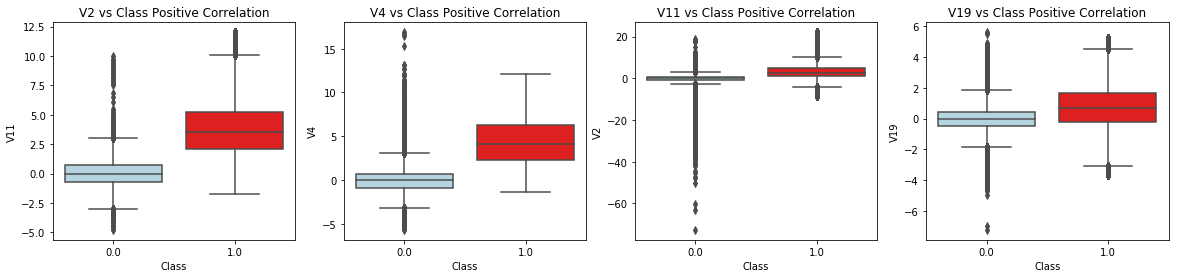

In [130]:
#SMOTE Data
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V2", data=smote_data, palette=colors, ax=axes[2])
axes[0].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=smote_data, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V11", data=smote_data, palette=colors, ax=axes[0])
axes[2].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V19", data=smote_data, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

There are clear outliers for both classes of outcome. Considering the type of data we are using we want to accomodate for legitimate one off purchases that would be considered outliers. However we want to learn the general model that classifies a fraudulent transaction as the outliers are much less common.

For this reason we will only remove outliers from the strongly correlated fraud classes, this will maintain a fairly equal balance between outcome of classes and allow the models to learn the most common flags for a fraudulent transaction. 

Below is the outlier removal for both the duplicated equal outcome dataset and the SMOTE dataset.

In [131]:
#V2
v2_fraud = equal_dup_data['V2'].loc[equal_dup_data['Class'] == 1].values
q25, q75 = np.percentile(v2_fraud, 25), np.percentile(v2_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v2_iqr = q75 - q25
print('iqr: {}'.format(v2_iqr))

v2_cut_off = v2_iqr * 3
v2_lower, v2_upper = q25 - v2_cut_off, q75 + v2_cut_off
print('Cut Off: {}'.format(v2_cut_off))
print('V2 Lower: {}'.format(v2_lower))
print('V2 Upper: {}'.format(v2_upper))

outliers = [x for x in v2_fraud if x < v2_lower or x > v2_upper]
print('Feature V2 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    equal_dup_data = equal_dup_data.drop(equal_dup_data[(equal_dup_data['V2'] > v2_upper) 
                                                        | (equal_dup_data['V2'] < v2_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(equal_dup_data)))
print('------' * 42)

#V4
v4_fraud = equal_dup_data['V4'].loc[equal_dup_data['Class'] == 1].values
q45, q75 = np.percentile(v4_fraud, 45), np.percentile(v4_fraud, 75)
print('Quartile 45: {} | Quartile 75: {}'.format(q45, q75))
v4_iqr = q75 - q45
print('iqr: {}'.format(v4_iqr))

v4_cut_off = v4_iqr * 3
v4_lower, v4_upper = q45 - v4_cut_off, q75 + v4_cut_off
print('Cut Off: {}'.format(v4_cut_off))
print('V4 Lower: {}'.format(v4_lower))
print('V4 Upper: {}'.format(v4_upper))

outliers = [x for x in v4_fraud if x < v4_lower or x > v4_upper]
print('Feature V4 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    equal_dup_data = equal_dup_data.drop(equal_dup_data[(equal_dup_data['V4'] > v4_upper) 
                                                        | (equal_dup_data['V4'] < v4_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(equal_dup_data)))
print('------' * 42)

#V11
v11_fraud = equal_dup_data['V11'].loc[equal_dup_data['Class'] == 1].values
q25, q75 = np.percentile(v11_fraud, 25), np.percentile(v11_fraud, 75)
print('Quartile 115: {} | Quartile 75: {}'.format(q25, q75))
v11_iqr = q75 - q25
print('iqr: {}'.format(v11_iqr))

v11_cut_off = v11_iqr * 3
v11_lower, v11_upper = q25 - v11_cut_off, q75 + v11_cut_off
print('Cut Off: {}'.format(v11_cut_off))
print('V11 Lower: {}'.format(v11_lower))
print('V11 Upper: {}'.format(v11_upper))

outliers = [x for x in v11_fraud if x < v11_lower or x > v11_upper]
print('Feature V11 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    equal_dup_data = equal_dup_data.drop(equal_dup_data[(equal_dup_data['V11'] > v11_upper) 
                                                        | (equal_dup_data['V11'] < v11_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(equal_dup_data)))
print('------' * 42)

#V19
v19_fraud = equal_dup_data['V19'].loc[equal_dup_data['Class'] == 1].values
q25, q75 = np.percentile(v19_fraud, 25), np.percentile(v19_fraud, 75)
print('Quartile 195: {} | Quartile 75: {}'.format(q25, q75))
v19_iqr = q75 - q25
print('iqr: {}'.format(v19_iqr))

v19_cut_off = v19_iqr * 3
v19_lower, v19_upper = q25 - v19_cut_off, q75 + v19_cut_off
print('Cut Off: {}'.format(v19_cut_off))
print('V19 Lower: {}'.format(v19_lower))
print('V19 Upper: {}'.format(v19_upper))

outliers = [x for x in v19_fraud if x < v19_lower or x > v19_upper]
print('Feature V19 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    equal_dup_data = equal_dup_data.drop(equal_dup_data[(equal_dup_data['V19'] > v19_upper) 
                                                        | (equal_dup_data['V19'] < v19_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(equal_dup_data)))
print('------' * 42)

Quartile 25: 1.1882258198658224 | Quartile 75: 4.9712573249056025
iqr: 3.78303150503978
Cut Off: 11.34909451511934
V2 Lower: -10.160868695253518
V2 Upper: 16.32035184002494
Feature V2 Outliers for Fraud Cases: 100
Number of Instances after outliers removal: 9723
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 45: 3.8120241310442697 | Quartile 75: 6.232531823306791
iqr: 2.420507692262521
Cut Off: 7.2615230767875625
V4 Lower: -3.4494989457432927
V4 Upper: 13.494054900094353
Feature V4 Outliers for Fraud Cases: 0
Number of Instances after outliers removal: 9723
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [132]:
#V2
v2_fraud = smote_data['V2'].loc[smote_data['Class'] == 1].values
q25, q75 = np.percentile(v2_fraud, 25), np.percentile(v2_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v2_iqr = q75 - q25
print('iqr: {}'.format(v2_iqr))

v2_cut_off = v2_iqr * 3
v2_lower, v2_upper = q25 - v2_cut_off, q75 + v2_cut_off
print('Cut Off: {}'.format(v2_cut_off))
print('V2 Lower: {}'.format(v2_lower))
print('V2 Upper: {}'.format(v2_upper))

outliers = [x for x in v2_fraud if x < v2_lower or x > v2_upper]
print('Feature V2 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    smote_data = smote_data.drop(smote_data[(smote_data['V2'] > v2_upper) | (smote_data['V2'] < v2_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(smote_data)))
print('------' * 42)

#V4
v4_fraud = smote_data['V4'].loc[smote_data['Class'] == 1].values
q45, q75 = np.percentile(v4_fraud, 45), np.percentile(v4_fraud, 75)
print('Quartile 45: {} | Quartile 75: {}'.format(q45, q75))
v4_iqr = q75 - q45
print('iqr: {}'.format(v4_iqr))

v4_cut_off = v4_iqr * 3
v4_lower, v4_upper = q45 - v4_cut_off, q75 + v4_cut_off
print('Cut Off: {}'.format(v4_cut_off))
print('V4 Lower: {}'.format(v4_lower))
print('V4 Upper: {}'.format(v4_upper))

outliers = [x for x in v4_fraud if x < v4_lower or x > v4_upper]
print('Feature V4 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    smote_data = smote_data.drop(smote_data[(smote_data['V4'] > v4_upper) | (smote_data['V4'] < v4_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(smote_data)))
print('------' * 42)

#V11
v11_fraud = smote_data['V11'].loc[smote_data['Class'] == 1].values
q25, q75 = np.percentile(v11_fraud, 25), np.percentile(v11_fraud, 75)
print('Quartile 115: {} | Quartile 75: {}'.format(q25, q75))
v11_iqr = q75 - q25
print('iqr: {}'.format(v11_iqr))

v11_cut_off = v11_iqr * 3
v11_lower, v11_upper = q25 - v11_cut_off, q75 + v11_cut_off
print('Cut Off: {}'.format(v11_cut_off))
print('V11 Lower: {}'.format(v11_lower))
print('V11 Upper: {}'.format(v11_upper))

outliers = [x for x in v11_fraud if x < v11_lower or x > v11_upper]
print('Feature V11 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    smote_data = smote_data.drop(smote_data[(smote_data['V11'] > v11_upper) | (smote_data['V11'] < v11_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(smote_data)))
print('------' * 42)

#V19
v19_fraud = smote_data['V19'].loc[smote_data['Class'] == 1].values
q25, q75 = np.percentile(v19_fraud, 25), np.percentile(v19_fraud, 75)
print('Quartile 195: {} | Quartile 75: {}'.format(q25, q75))
v19_iqr = q75 - q25
print('iqr: {}'.format(v19_iqr))

v19_cut_off = v19_iqr * 3
v19_lower, v19_upper = q25 - v19_cut_off, q75 + v19_cut_off
print('Cut Off: {}'.format(v19_cut_off))
print('V19 Lower: {}'.format(v19_lower))
print('V19 Upper: {}'.format(v19_upper))

outliers = [x for x in v19_fraud if x < v19_lower or x > v19_upper]
print('Feature V19 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    smote_data = smote_data.drop(smote_data[(smote_data['V19'] > v19_upper) | (smote_data['V19'] < v19_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(smote_data)))
print('------' * 42)

Quartile 25: 1.2294785557056582 | Quartile 75: 4.8573692802269655
iqr: 3.6278907245213072
Cut Off: 10.883672173563921
V2 Lower: -9.654193617858263
V2 Upper: 15.741041453790887
Feature V2 Outliers for Fraud Cases: 6771
Number of Instances after outliers removal: 561107
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 45: 3.6749713112016535 | Quartile 75: 6.159424807403292
iqr: 2.4844534962016387
Cut Off: 7.4533604886049165
V4 Lower: -3.778389177403263
V4 Upper: 13.612785296008209
Feature V4 Outliers for Fraud Cases: 0
Number of Instances after outliers removal: 561107
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

We can now plot again to see the reduction in outliers.

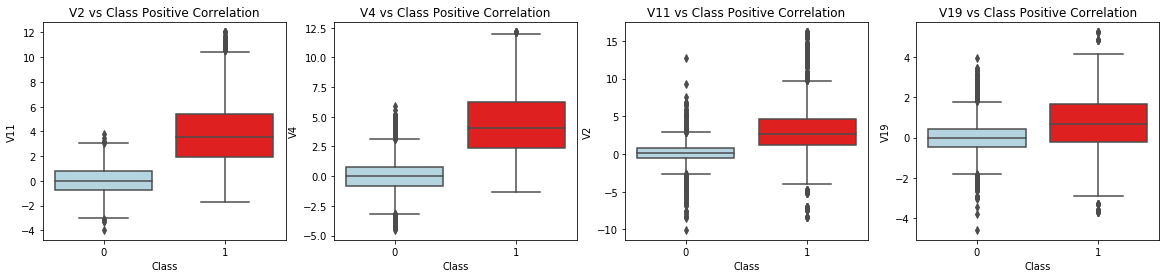

In [133]:
#Equal Outcome Duplicated Data
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V2", data=equal_dup_data, palette=colors, ax=axes[2])
axes[0].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=equal_dup_data, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V11", data=equal_dup_data, palette=colors, ax=axes[0])
axes[2].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V19", data=equal_dup_data, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

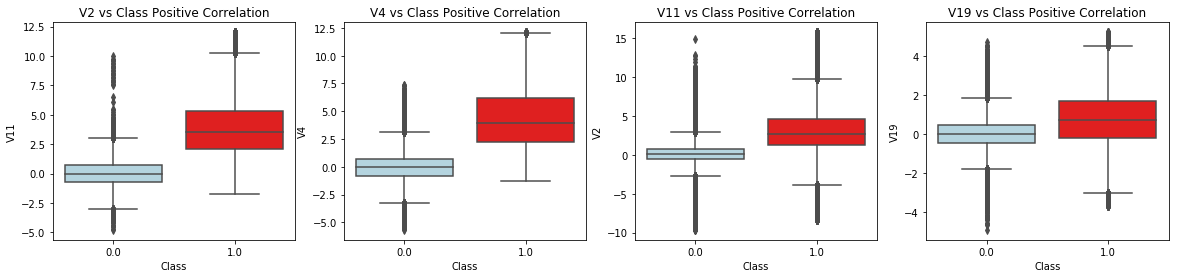

In [134]:
#SMOTE Data
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V2", data=smote_data, palette=colors, ax=axes[2])
axes[0].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=smote_data, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V11", data=smote_data, palette=colors, ax=axes[0])
axes[2].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V19", data=smote_data, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

Now look at the negatively correlated features:

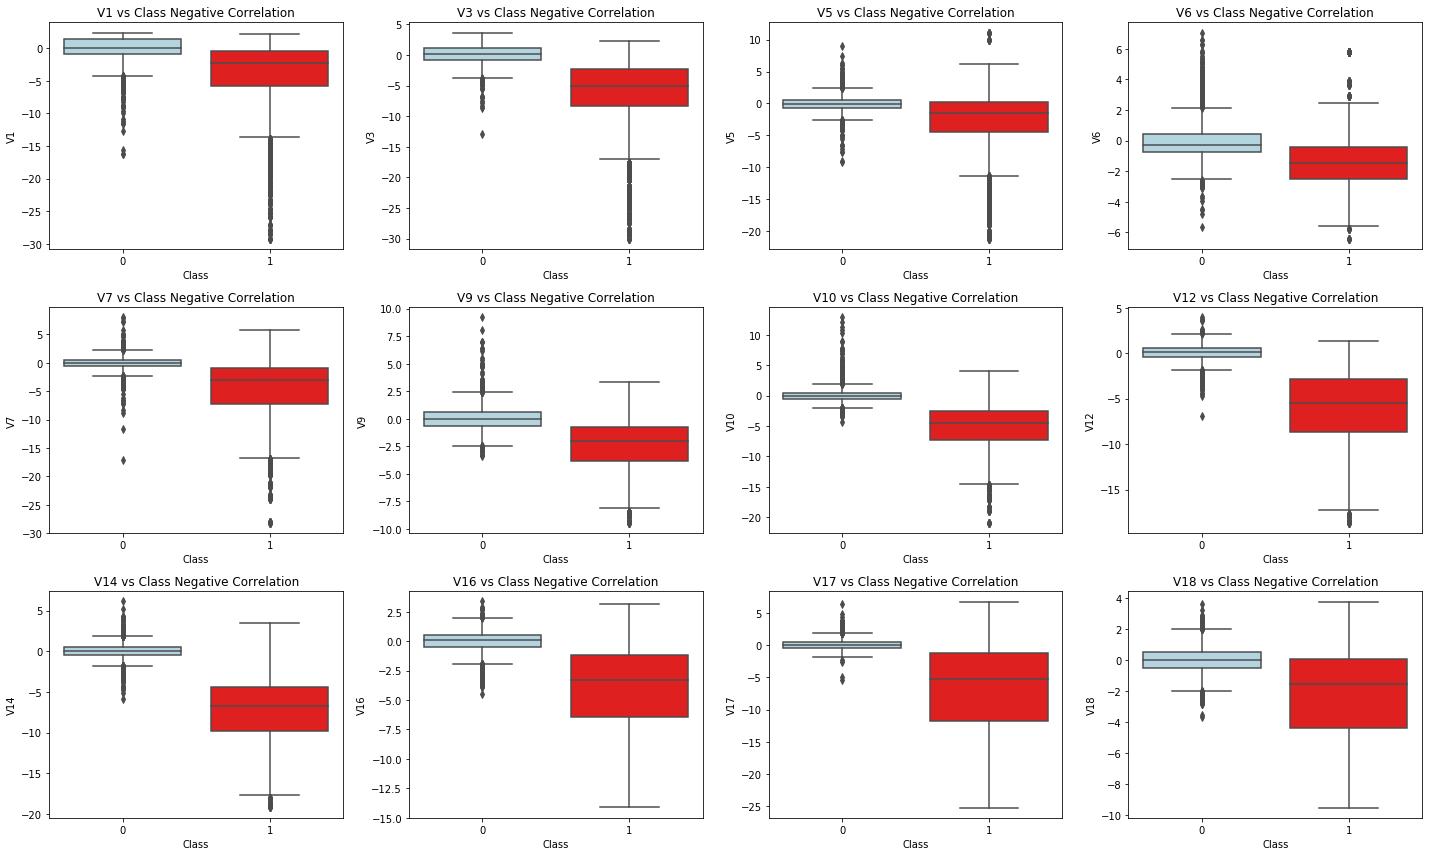

In [135]:
#Equal dup Data
f, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,12))

sns.boxplot(x="Class", y="V1", data=equal_dup_data, palette=colors, ax=axes[0,0])
axes[0,0].set_title('V1 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V3", data=equal_dup_data, palette=colors, ax=axes[0,1])
axes[0,1].set_title('V3 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V5", data=equal_dup_data, palette=colors, ax=axes[0,2])
axes[0,2].set_title('V5 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V6", data=equal_dup_data, palette=colors, ax=axes[0,3])
axes[0,3].set_title('V6 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V7", data=equal_dup_data, palette=colors, ax=axes[1,0])
axes[1,0].set_title('V7 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V9", data=equal_dup_data, palette=colors, ax=axes[1,1])
axes[1,1].set_title('V9 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=equal_dup_data, palette=colors, ax=axes[1,2])
axes[1,2].set_title('V10 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=equal_dup_data, palette=colors, ax=axes[1,3])
axes[1,3].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=equal_dup_data, palette=colors, ax=axes[2,0])
axes[2,0].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V16", data=equal_dup_data, palette=colors, ax=axes[2,1])
axes[2,1].set_title('V16 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V17", data=equal_dup_data, palette=colors, ax=axes[2,2])
axes[2,2].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V18", data=equal_dup_data, palette=colors, ax=axes[2,3])
axes[2,3].set_title('V18 vs Class Negative Correlation')

plt.tight_layout()
plt.show()

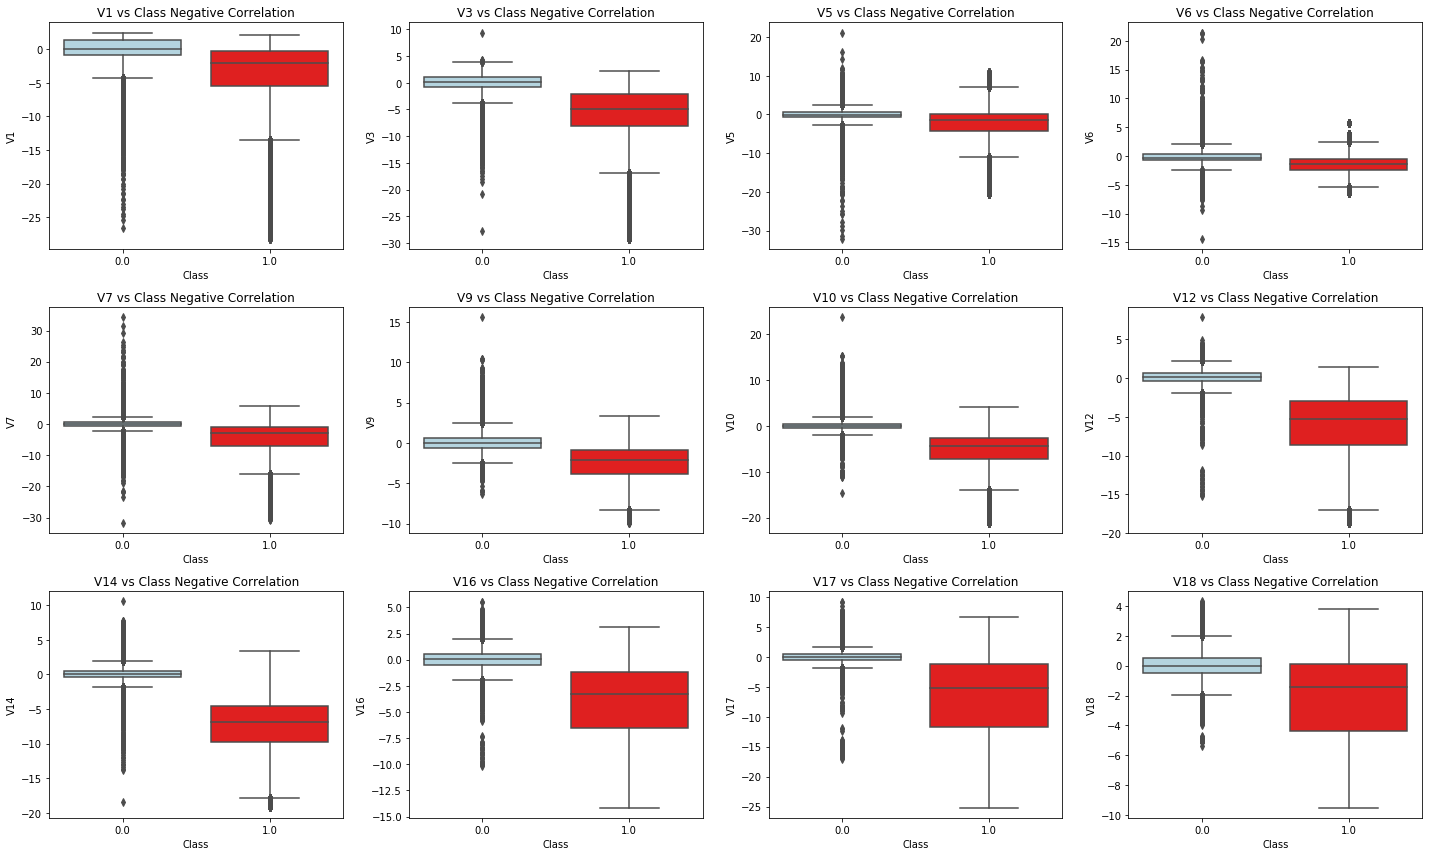

In [136]:
#SMOTE Data
f, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,12))

sns.boxplot(x="Class", y="V1", data=smote_data, palette=colors, ax=axes[0,0])
axes[0,0].set_title('V1 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V3", data=smote_data, palette=colors, ax=axes[0,1])
axes[0,1].set_title('V3 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V5", data=smote_data, palette=colors, ax=axes[0,2])
axes[0,2].set_title('V5 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V6", data=smote_data, palette=colors, ax=axes[0,3])
axes[0,3].set_title('V6 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V7", data=smote_data, palette=colors, ax=axes[1,0])
axes[1,0].set_title('V7 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V9", data=smote_data, palette=colors, ax=axes[1,1])
axes[1,1].set_title('V9 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=smote_data, palette=colors, ax=axes[1,2])
axes[1,2].set_title('V10 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=smote_data, palette=colors, ax=axes[1,3])
axes[1,3].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=smote_data, palette=colors, ax=axes[2,0])
axes[2,0].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V16", data=smote_data, palette=colors, ax=axes[2,1])
axes[2,1].set_title('V16 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V17", data=smote_data, palette=colors, ax=axes[2,2])
axes[2,2].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V18", data=smote_data, palette=colors, ax=axes[2,3])
axes[2,3].set_title('V18 vs Class Negative Correlation')

plt.tight_layout()
plt.show()

In [137]:
#V1
v1_fraud = equal_dup_data['V1'].loc[equal_dup_data['Class'] == 1].values
q25, q75 = np.percentile(v1_fraud, 25), np.percentile(v1_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v1_iqr = q75 - q25
print('iqr: {}'.format(v1_iqr))

v1_cut_off = v1_iqr * 1.5
v1_lower, v1_upper = q25 - v1_cut_off, q75 + v1_cut_off
print('Cut Off: {}'.format(v1_cut_off))
print('V1 Lower: {}'.format(v1_lower))
print('V1 Upper: {}'.format(v1_upper))

outliers = [x for x in v1_fraud if x < v1_lower or x > v1_upper]
print('Feature V1 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    equal_dup_data = equal_dup_data.drop(equal_dup_data[(equal_dup_data['V1'] > v1_upper) 
                                                        | (equal_dup_data['V1'] < v1_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(equal_dup_data)))
print('------' * 42)

#V3
v3_fraud = equal_dup_data['V3'].loc[equal_dup_data['Class'] == 1].values
q25, q75 = np.percentile(v3_fraud, 25), np.percentile(v3_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v3_iqr = q75 - q25
print('iqr: {}'.format(v3_iqr))

v3_cut_off = v3_iqr * 1.5
v3_lower, v3_upper = q25 - v3_cut_off, q75 + v3_cut_off
print('Cut Off: {}'.format(v3_cut_off))
print('V3 Lower: {}'.format(v3_lower))
print('V3 Upper: {}'.format(v3_upper))

outliers = [x for x in v3_fraud if x < v3_lower or x > v3_upper]
print('Feature V3 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    equal_dup_data = equal_dup_data.drop(equal_dup_data[(equal_dup_data['V3'] > v3_upper) 
                                                        | (equal_dup_data['V3'] < v3_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(equal_dup_data)))
print('------' * 42)

#V5
v5_fraud = equal_dup_data['V5'].loc[equal_dup_data['Class'] == 1].values
q25, q75 = np.percentile(v5_fraud, 25), np.percentile(v5_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v5_iqr = q75 - q25
print('iqr: {}'.format(v5_iqr))

v5_cut_off = v5_iqr * 1.5
v5_lower, v5_upper = q25 - v5_cut_off, q75 + v5_cut_off
print('Cut Off: {}'.format(v5_cut_off))
print('V5 Lower: {}'.format(v5_lower))
print('V5 Upper: {}'.format(v5_upper))

outliers = [x for x in v5_fraud if x < v5_lower or x > v5_upper]
print('Feature V5 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    equal_dup_data = equal_dup_data.drop(equal_dup_data[(equal_dup_data['V5'] > v5_upper) 
                                                        | (equal_dup_data['V5'] < v5_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(equal_dup_data)))
print('------' * 42)

#V6
v6_fraud = equal_dup_data['V6'].loc[equal_dup_data['Class'] == 1].values
q25, q75 = np.percentile(v6_fraud, 25), np.percentile(v6_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v6_iqr = q75 - q25
print('iqr: {}'.format(v6_iqr))

v6_cut_off = v6_iqr * 1.5
v6_lower, v6_upper = q25 - v6_cut_off, q75 + v6_cut_off
print('Cut Off: {}'.format(v6_cut_off))
print('V6 Lower: {}'.format(v6_lower))
print('V6 Upper: {}'.format(v6_upper))

outliers = [x for x in v6_fraud if x < v6_lower or x > v6_upper]
print('Feature V6 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    equal_dup_data = equal_dup_data.drop(equal_dup_data[(equal_dup_data['V6'] > v6_upper) 
                                                        | (equal_dup_data['V6'] < v6_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(equal_dup_data)))
print('------' * 42)

#V7
v7_fraud = equal_dup_data['V7'].loc[equal_dup_data['Class'] == 1].values
q25, q75 = np.percentile(v7_fraud, 25), np.percentile(v7_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v7_iqr = q75 - q25
print('iqr: {}'.format(v7_iqr))

v7_cut_off = v7_iqr * 1.5
v7_lower, v7_upper = q25 - v7_cut_off, q75 + v7_cut_off
print('Cut Off: {}'.format(v7_cut_off))
print('V7 Lower: {}'.format(v7_lower))
print('V7 Upper: {}'.format(v7_upper))

outliers = [x for x in v7_fraud if x < v7_lower or x > v7_upper]
print('Feature V7 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    equal_dup_data = equal_dup_data.drop(equal_dup_data[(equal_dup_data['V7'] > v7_upper) 
                                                        | (equal_dup_data['V7'] < v7_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(equal_dup_data)))
print('------' * 42)

#V9
v9_fraud = equal_dup_data['V9'].loc[equal_dup_data['Class'] == 1].values
q25, q75 = np.percentile(v9_fraud, 25), np.percentile(v9_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v9_iqr = q75 - q25
print('iqr: {}'.format(v9_iqr))

v9_cut_off = v9_iqr * 1.5
v9_lower, v9_upper = q25 - v9_cut_off, q75 + v9_cut_off
print('Cut Off: {}'.format(v9_cut_off))
print('V9 Lower: {}'.format(v9_lower))
print('V9 Upper: {}'.format(v9_upper))

outliers = [x for x in v9_fraud if x < v9_lower or x > v9_upper]
print('Feature V9 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    equal_dup_data = equal_dup_data.drop(equal_dup_data[(equal_dup_data['V9'] > v9_upper) 
                                                        | (equal_dup_data['V9'] < v9_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(equal_dup_data)))
print('------' * 42)

#V10
v10_fraud = equal_dup_data['V10'].loc[equal_dup_data['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v10_iqr = q75 - q25
print('iqr: {}'.format(v10_iqr))

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('Cut Off: {}'.format(v10_cut_off))
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))

outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    equal_dup_data = equal_dup_data.drop(equal_dup_data[(equal_dup_data['V10'] > v10_upper) 
                                                        | (equal_dup_data['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(equal_dup_data)))
print('------' * 42)

#V12
v12_fraud = equal_dup_data['V12'].loc[equal_dup_data['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v12_iqr = q75 - q25
print('iqr: {}'.format(v12_iqr))

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('Cut Off: {}'.format(v12_cut_off))
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))

outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    equal_dup_data = equal_dup_data.drop(equal_dup_data[(equal_dup_data['V12'] > v12_upper) 
                                                        | (equal_dup_data['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(equal_dup_data)))
print('------' * 42)

#V14
v14_fraud = equal_dup_data['V14'].loc[equal_dup_data['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    equal_dup_data = equal_dup_data.drop(equal_dup_data[(equal_dup_data['V14'] > v14_upper) 
                                                        | (equal_dup_data['V14'] < v14_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(equal_dup_data)))
print('------' * 42)

#V16
v16_fraud = equal_dup_data['V16'].loc[equal_dup_data['Class'] == 1].values
q25, q75 = np.percentile(v16_fraud, 25), np.percentile(v16_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v16_iqr = q75 - q25
print('iqr: {}'.format(v16_iqr))

v16_cut_off = v16_iqr * 1.5
v16_lower, v16_upper = q25 - v16_cut_off, q75 + v16_cut_off
print('Cut Off: {}'.format(v16_cut_off))
print('V16 Lower: {}'.format(v16_lower))
print('V16 Upper: {}'.format(v16_upper))

outliers = [x for x in v16_fraud if x < v16_lower or x > v16_upper]
print('Feature V16 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    equal_dup_data = equal_dup_data.drop(equal_dup_data[(equal_dup_data['V16'] > v16_upper) 
                                                        | (equal_dup_data['V16'] < v16_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(equal_dup_data)))
print('------' * 42)

#V17
v17_fraud = equal_dup_data['V17'].loc[equal_dup_data['Class'] == 1].values
q25, q75 = np.percentile(v17_fraud, 25), np.percentile(v17_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v17_iqr = q75 - q25
print('iqr: {}'.format(v17_iqr))

v17_cut_off = v17_iqr * 1.5
v17_lower, v17_upper = q25 - v17_cut_off, q75 + v17_cut_off
print('Cut Off: {}'.format(v17_cut_off))
print('V17 Lower: {}'.format(v17_lower))
print('V17 Upper: {}'.format(v17_upper))

outliers = [x for x in v17_fraud if x < v17_lower or x > v17_upper]
print('Feature V17 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    equal_dup_data = equal_dup_data.drop(equal_dup_data[(equal_dup_data['V17'] > v17_upper) 
                                                        | (equal_dup_data['V17'] < v17_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(equal_dup_data)))
print('------' * 42)

#V18
v18_fraud = equal_dup_data['V18'].loc[equal_dup_data['Class'] == 1].values
q25, q75 = np.percentile(v18_fraud, 25), np.percentile(v18_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v18_iqr = q75 - q25
print('iqr: {}'.format(v18_iqr))

v18_cut_off = v18_iqr * 1.5
v18_lower, v18_upper = q25 - v18_cut_off, q75 + v18_cut_off
print('Cut Off: {}'.format(v18_cut_off))
print('V18 Lower: {}'.format(v18_lower))
print('V18 Upper: {}'.format(v18_upper))

outliers = [x for x in v18_fraud if x < v18_lower or x > v18_upper]
print('Feature V18 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    equal_dup_data = equal_dup_data.drop(equal_dup_data[(equal_dup_data['V18'] > v18_upper) 
                                                        | (equal_dup_data['V18'] < v18_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(equal_dup_data)))
print('------' * 42)

Quartile 25: -5.76687873469586 | Quartile 75: -0.395582180999488
iqr: 5.3712965536963715
Cut Off: 8.056944830544557
V1 Lower: -13.823823565240417
V1 Upper: 7.661362649545069
Feature V1 Outliers for Fraud Cases: 440
Number of Instances after outliers removal: 9269
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: -6.73039574613665 | Quartile 75: -1.99412200641801
iqr: 4.73627373971864
Cut Off: 7.104410609577959
V3 Lower: -13.834806355714608
V3 Upper: 5.110288603159949
Feature V3 Outliers for Fraud Cases: 180
Number of Instances after outliers removal: 9087
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [138]:
#V1
v1_fraud = smote_data['V1'].loc[smote_data['Class'] == 1].values
q25, q75 = np.percentile(v1_fraud, 25), np.percentile(v1_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v1_iqr = q75 - q25
print('iqr: {}'.format(v1_iqr))

v1_cut_off = v1_iqr * 1.5
v1_lower, v1_upper = q25 - v1_cut_off, q75 + v1_cut_off
print('Cut Off: {}'.format(v1_cut_off))
print('V1 Lower: {}'.format(v1_lower))
print('V1 Upper: {}'.format(v1_upper))

outliers = [x for x in v1_fraud if x < v1_lower or x > v1_upper]
print('Feature V1 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    smote_data = smote_data.drop(smote_data[(smote_data['V1'] > v1_upper) 
                                                        | (smote_data['V1'] < v1_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(smote_data)))
print('------' * 42)

#V3
v3_fraud = smote_data['V3'].loc[smote_data['Class'] == 1].values
q25, q75 = np.percentile(v3_fraud, 25), np.percentile(v3_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v3_iqr = q75 - q25
print('iqr: {}'.format(v3_iqr))

v3_cut_off = v3_iqr * 1.5
v3_lower, v3_upper = q25 - v3_cut_off, q75 + v3_cut_off
print('Cut Off: {}'.format(v3_cut_off))
print('V3 Lower: {}'.format(v3_lower))
print('V3 Upper: {}'.format(v3_upper))

outliers = [x for x in v3_fraud if x < v3_lower or x > v3_upper]
print('Feature V3 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    smote_data = smote_data.drop(smote_data[(smote_data['V3'] > v3_upper) 
                                                        | (smote_data['V3'] < v3_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(smote_data)))
print('------' * 42)

#V5
v5_fraud = smote_data['V5'].loc[smote_data['Class'] == 1].values
q25, q75 = np.percentile(v5_fraud, 25), np.percentile(v5_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v5_iqr = q75 - q25
print('iqr: {}'.format(v5_iqr))

v5_cut_off = v5_iqr * 1.5
v5_lower, v5_upper = q25 - v5_cut_off, q75 + v5_cut_off
print('Cut Off: {}'.format(v5_cut_off))
print('V5 Lower: {}'.format(v5_lower))
print('V5 Upper: {}'.format(v5_upper))

outliers = [x for x in v5_fraud if x < v5_lower or x > v5_upper]
print('Feature V5 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    smote_data = smote_data.drop(smote_data[(smote_data['V5'] > v5_upper) 
                                                        | (smote_data['V5'] < v5_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(smote_data)))
print('------' * 42)

#V6
v6_fraud = smote_data['V6'].loc[smote_data['Class'] == 1].values
q25, q75 = np.percentile(v6_fraud, 25), np.percentile(v6_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v6_iqr = q75 - q25
print('iqr: {}'.format(v6_iqr))

v6_cut_off = v6_iqr * 1.5
v6_lower, v6_upper = q25 - v6_cut_off, q75 + v6_cut_off
print('Cut Off: {}'.format(v6_cut_off))
print('V6 Lower: {}'.format(v6_lower))
print('V6 Upper: {}'.format(v6_upper))

outliers = [x for x in v6_fraud if x < v6_lower or x > v6_upper]
print('Feature V6 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    smote_data = smote_data.drop(smote_data[(smote_data['V6'] > v6_upper) 
                                                        | (smote_data['V6'] < v6_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(smote_data)))
print('------' * 42)

#V7
v7_fraud = smote_data['V7'].loc[smote_data['Class'] == 1].values
q25, q75 = np.percentile(v7_fraud, 25), np.percentile(v7_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v7_iqr = q75 - q25
print('iqr: {}'.format(v7_iqr))

v7_cut_off = v7_iqr * 1.5
v7_lower, v7_upper = q25 - v7_cut_off, q75 + v7_cut_off
print('Cut Off: {}'.format(v7_cut_off))
print('V7 Lower: {}'.format(v7_lower))
print('V7 Upper: {}'.format(v7_upper))

outliers = [x for x in v7_fraud if x < v7_lower or x > v7_upper]
print('Feature V7 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    smote_data = smote_data.drop(smote_data[(smote_data['V7'] > v7_upper) 
                                                        | (smote_data['V7'] < v7_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(smote_data)))
print('------' * 42)

#V9
v9_fraud = smote_data['V9'].loc[smote_data['Class'] == 1].values
q25, q75 = np.percentile(v9_fraud, 25), np.percentile(v9_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v9_iqr = q75 - q25
print('iqr: {}'.format(v9_iqr))

v9_cut_off = v9_iqr * 1.5
v9_lower, v9_upper = q25 - v9_cut_off, q75 + v9_cut_off
print('Cut Off: {}'.format(v9_cut_off))
print('V9 Lower: {}'.format(v9_lower))
print('V9 Upper: {}'.format(v9_upper))

outliers = [x for x in v9_fraud if x < v9_lower or x > v9_upper]
print('Feature V9 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    smote_data = smote_data.drop(smote_data[(smote_data['V9'] > v9_upper) 
                                                        | (smote_data['V9'] < v9_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(smote_data)))
print('------' * 42)

#V10
v10_fraud = smote_data['V10'].loc[smote_data['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v10_iqr = q75 - q25
print('iqr: {}'.format(v10_iqr))

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('Cut Off: {}'.format(v10_cut_off))
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))

outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    smote_data = smote_data.drop(smote_data[(smote_data['V10'] > v10_upper) 
                                                        | (smote_data['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(smote_data)))
print('------' * 42)

#V12
v12_fraud = smote_data['V12'].loc[smote_data['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v12_iqr = q75 - q25
print('iqr: {}'.format(v12_iqr))

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('Cut Off: {}'.format(v12_cut_off))
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))

outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    smote_data = smote_data.drop(smote_data[(smote_data['V12'] > v12_upper) 
                                                        | (smote_data['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(smote_data)))
print('------' * 42)

#V14
v14_fraud = smote_data['V14'].loc[smote_data['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    smote_data = smote_data.drop(smote_data[(smote_data['V14'] > v14_upper) 
                                                        | (smote_data['V14'] < v14_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(smote_data)))
print('------' * 42)

#V16
v16_fraud = smote_data['V16'].loc[smote_data['Class'] == 1].values
q25, q75 = np.percentile(v16_fraud, 25), np.percentile(v16_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v16_iqr = q75 - q25
print('iqr: {}'.format(v16_iqr))

v16_cut_off = v16_iqr * 1.5
v16_lower, v16_upper = q25 - v16_cut_off, q75 + v16_cut_off
print('Cut Off: {}'.format(v16_cut_off))
print('V16 Lower: {}'.format(v16_lower))
print('V16 Upper: {}'.format(v16_upper))

outliers = [x for x in v16_fraud if x < v16_lower or x > v16_upper]
print('Feature V16 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    smote_data = smote_data.drop(smote_data[(smote_data['V16'] > v16_upper) 
                                                        | (smote_data['V16'] < v16_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(smote_data)))
print('------' * 42)

#V17
v17_fraud = smote_data['V17'].loc[smote_data['Class'] == 1].values
q25, q75 = np.percentile(v17_fraud, 25), np.percentile(v17_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v17_iqr = q75 - q25
print('iqr: {}'.format(v17_iqr))

v17_cut_off = v17_iqr * 1.5
v17_lower, v17_upper = q25 - v17_cut_off, q75 + v17_cut_off
print('Cut Off: {}'.format(v17_cut_off))
print('V17 Lower: {}'.format(v17_lower))
print('V17 Upper: {}'.format(v17_upper))

outliers = [x for x in v17_fraud if x < v17_lower or x > v17_upper]
print('Feature V17 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    smote_data = smote_data.drop(smote_data[(smote_data['V17'] > v17_upper) 
                                                        | (smote_data['V17'] < v17_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(smote_data)))
print('------' * 42)

#V18
v18_fraud = smote_data['V18'].loc[smote_data['Class'] == 1].values
q25, q75 = np.percentile(v18_fraud, 25), np.percentile(v18_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v18_iqr = q75 - q25
print('iqr: {}'.format(v18_iqr))

v18_cut_off = v18_iqr * 1.5
v18_lower, v18_upper = q25 - v18_cut_off, q75 + v18_cut_off
print('Cut Off: {}'.format(v18_cut_off))
print('V18 Lower: {}'.format(v18_lower))
print('V18 Upper: {}'.format(v18_upper))

outliers = [x for x in v18_fraud if x < v18_lower or x > v18_upper]
print('Feature V18 Outliers for Fraud Cases: {}'.format(len(outliers)))
if (len(outliers) > 0):
    smote_data = smote_data.drop(smote_data[(smote_data['V18'] > v18_upper) 
                                                        | (smote_data['V18'] < v18_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(smote_data)))
print('------' * 42)

Quartile 25: -5.5200452734608145 | Quartile 75: -0.200350557219234
iqr: 5.319694716241581
Cut Off: 7.979542074362371
V1 Lower: -13.499587347823185
V1 Upper: 7.779191517143137
Feature V1 Outliers for Fraud Cases: 24991
Number of Instances after outliers removal: 535996
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: -6.521709788934727 | Quartile 75: -1.8504575145081443
iqr: 4.671252274426583
Cut Off: 7.006878411639875
V3 Lower: -13.528588200574601
V3 Upper: 5.1564208971317305
Feature V3 Outliers for Fraud Cases: 10882
Number of Instances after outliers removal: 525104
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

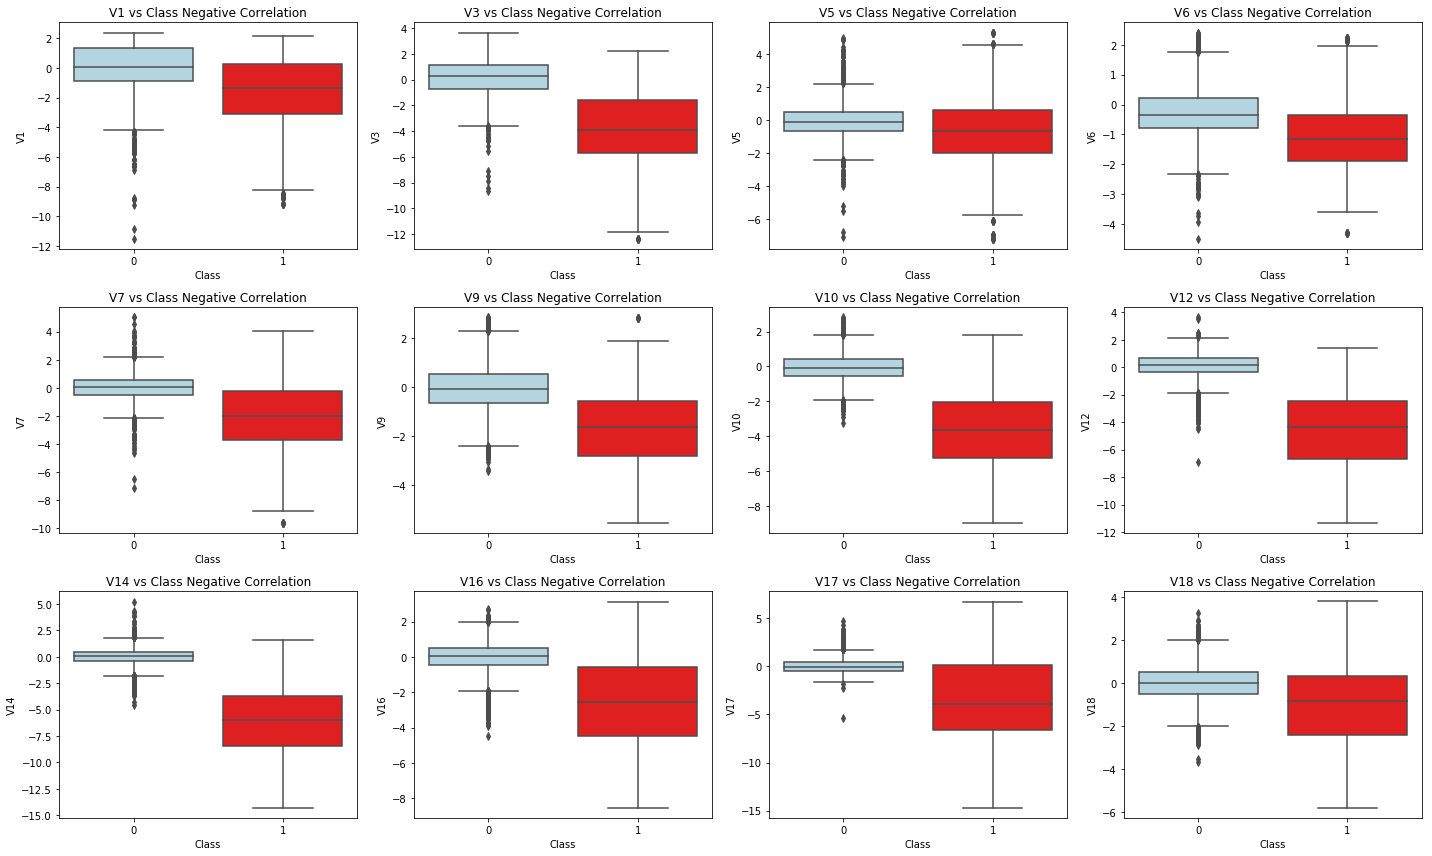

In [139]:
#Equal dup Data
f, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,12))

sns.boxplot(x="Class", y="V1", data=equal_dup_data, palette=colors, ax=axes[0,0])
axes[0,0].set_title('V1 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V3", data=equal_dup_data, palette=colors, ax=axes[0,1])
axes[0,1].set_title('V3 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V5", data=equal_dup_data, palette=colors, ax=axes[0,2])
axes[0,2].set_title('V5 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V6", data=equal_dup_data, palette=colors, ax=axes[0,3])
axes[0,3].set_title('V6 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V7", data=equal_dup_data, palette=colors, ax=axes[1,0])
axes[1,0].set_title('V7 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V9", data=equal_dup_data, palette=colors, ax=axes[1,1])
axes[1,1].set_title('V9 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=equal_dup_data, palette=colors, ax=axes[1,2])
axes[1,2].set_title('V10 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=equal_dup_data, palette=colors, ax=axes[1,3])
axes[1,3].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=equal_dup_data, palette=colors, ax=axes[2,0])
axes[2,0].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V16", data=equal_dup_data, palette=colors, ax=axes[2,1])
axes[2,1].set_title('V16 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V17", data=equal_dup_data, palette=colors, ax=axes[2,2])
axes[2,2].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V18", data=equal_dup_data, palette=colors, ax=axes[2,3])
axes[2,3].set_title('V18 vs Class Negative Correlation')

plt.tight_layout()
plt.show()

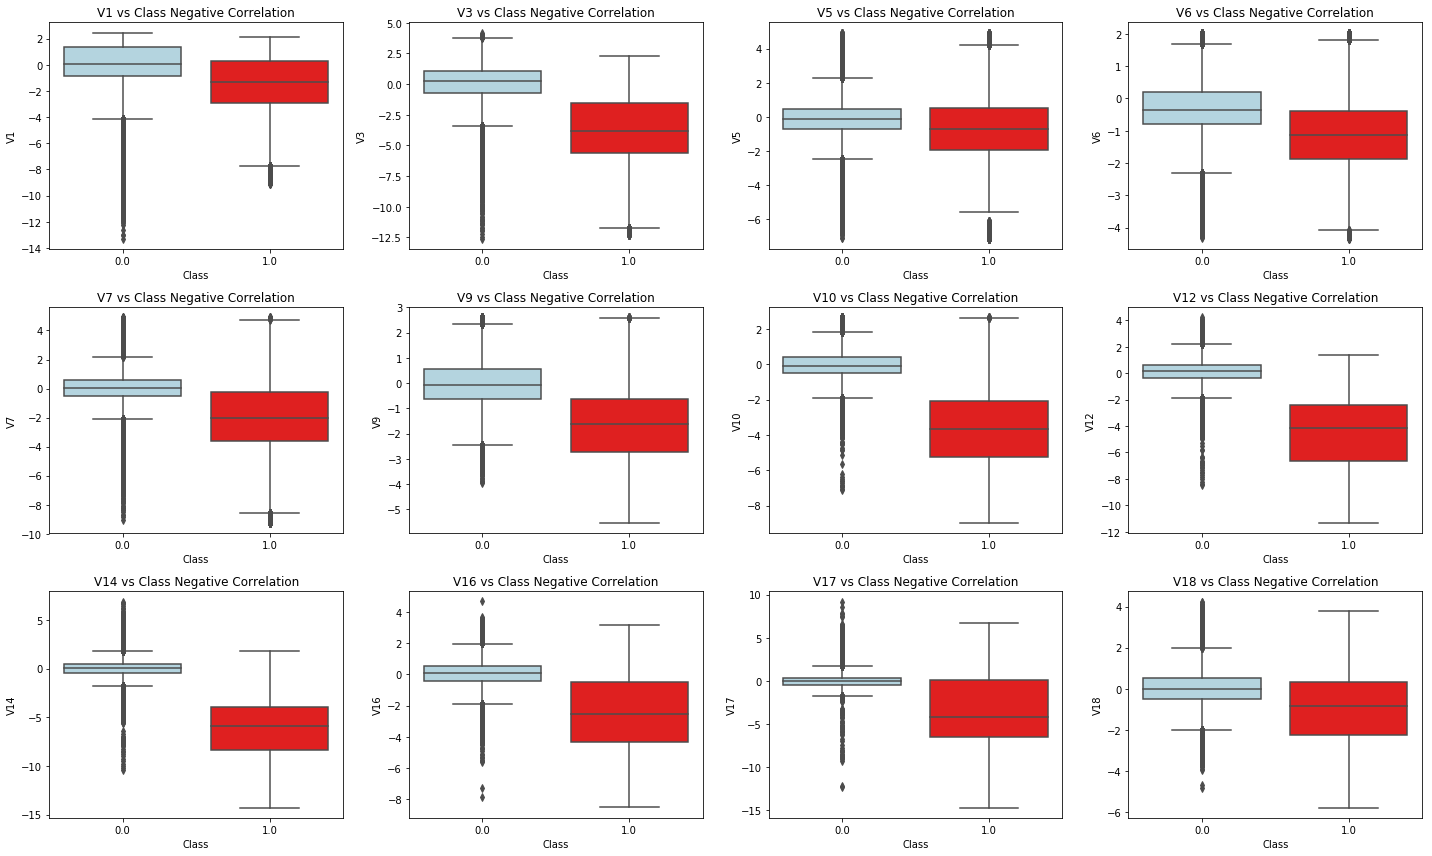

In [140]:
#SMOTE Data
f, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,12))

sns.boxplot(x="Class", y="V1", data=smote_data, palette=colors, ax=axes[0,0])
axes[0,0].set_title('V1 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V3", data=smote_data, palette=colors, ax=axes[0,1])
axes[0,1].set_title('V3 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V5", data=smote_data, palette=colors, ax=axes[0,2])
axes[0,2].set_title('V5 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V6", data=smote_data, palette=colors, ax=axes[0,3])
axes[0,3].set_title('V6 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V7", data=smote_data, palette=colors, ax=axes[1,0])
axes[1,0].set_title('V7 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V9", data=smote_data, palette=colors, ax=axes[1,1])
axes[1,1].set_title('V9 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=smote_data, palette=colors, ax=axes[1,2])
axes[1,2].set_title('V10 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=smote_data, palette=colors, ax=axes[1,3])
axes[1,3].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=smote_data, palette=colors, ax=axes[2,0])
axes[2,0].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V16", data=smote_data, palette=colors, ax=axes[2,1])
axes[2,1].set_title('V16 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V17", data=smote_data, palette=colors, ax=axes[2,2])
axes[2,2].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V18", data=smote_data, palette=colors, ax=axes[2,3])
axes[2,3].set_title('V18 vs Class Negative Correlation')

plt.tight_layout()
plt.show()

## 3: Exploratory Data Analysis

Here we will make some plots and do some further statistical analysis in order to better understand how best to model the data.
We will begin by checking for higher order correlations with the data.

Text(0.5,1,'Equal Outcome Cubed Data Correlation Matrix')

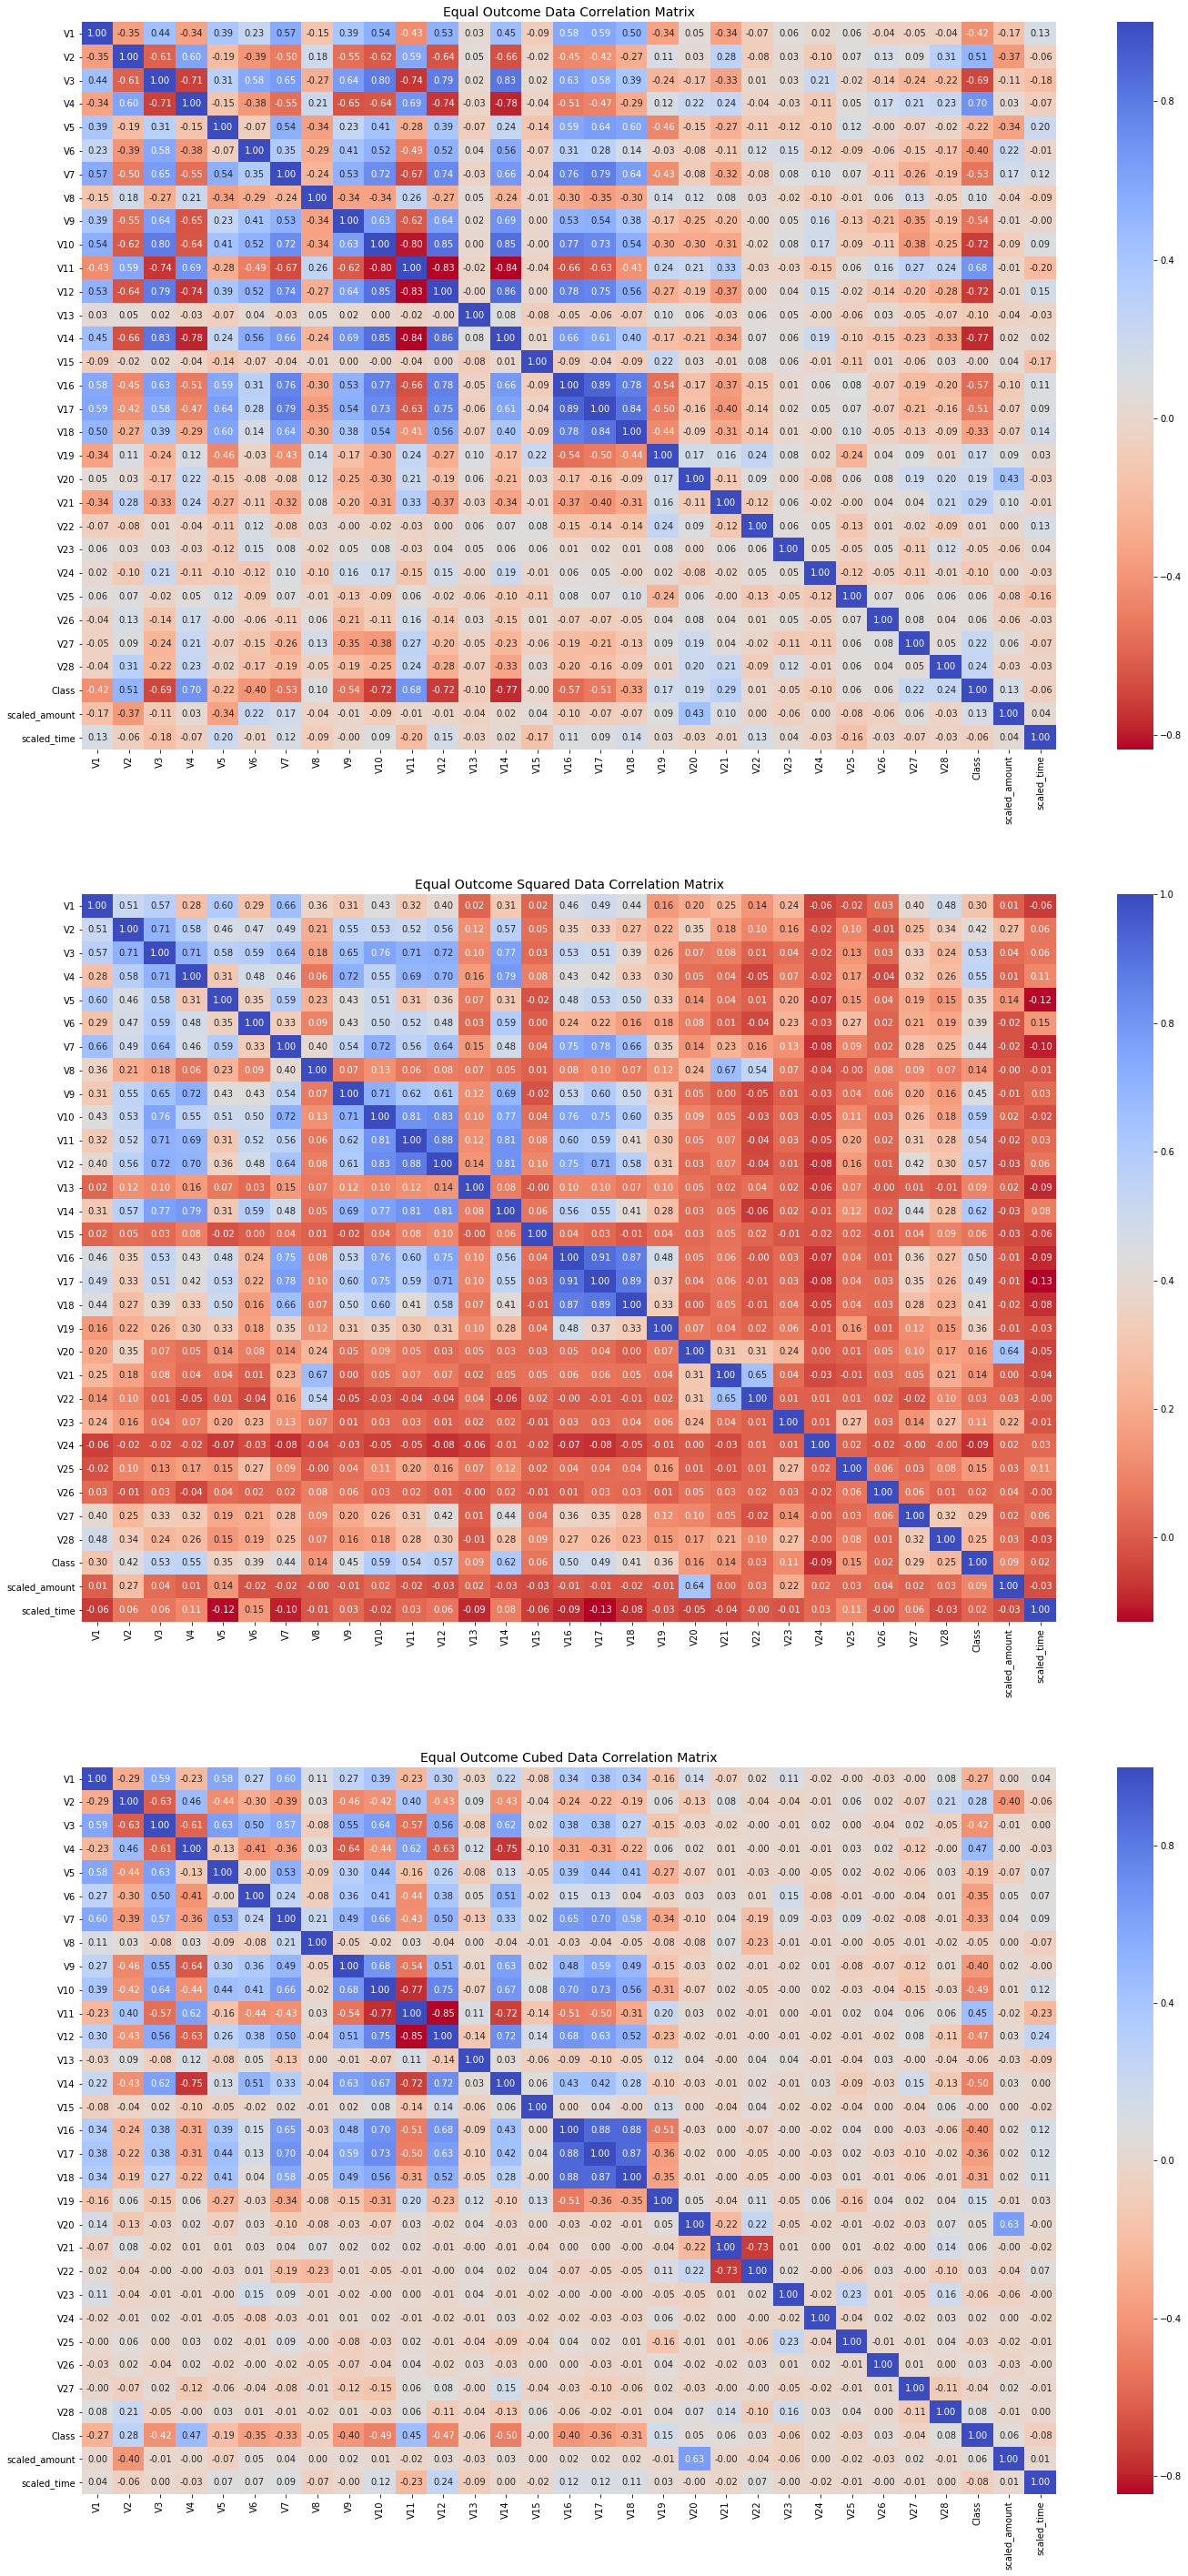

In [141]:
equal_dup_quad_data = np.square(equal_dup_data)
equal_dup_cube_data = np.power(equal_dup_data, 3)

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(24,50))

equal_dup_corr = equal_dup_data.corr()
sns.heatmap(equal_dup_corr, cmap='coolwarm_r', annot=True, fmt='.2f', annot_kws={'size':10}, ax=ax1)
ax1.set_title('Equal Outcome Data Correlation Matrix', fontsize=14)

equal_dup_quad_corr = equal_dup_quad_data.corr()
sns.heatmap(equal_dup_quad_corr, cmap='coolwarm_r', annot=True, fmt='.2f', annot_kws={'size':10}, ax=ax2)
ax2.set_title('Equal Outcome Squared Data Correlation Matrix', fontsize=14)

equal_dup_cube_corr = equal_dup_cube_data.corr()
sns.heatmap(equal_dup_cube_corr, cmap='coolwarm_r', annot=True, fmt='.2f', annot_kws={'size':10}, ax=ax3)
ax3.set_title('Equal Outcome Cubed Data Correlation Matrix', fontsize=14)

Comparing the linear and quadratic correlations reveals that a lot of the weakly correlating linear relationship are improved substantially by squaring the data, this is particularly true with features V5, V18, V19, V23, and V25. We can make the transformation later to potentially see an increase in model accuracy. 

The cubed data generally produces a decrease in correlation and from this point onwards will not be used.

Now we can reduce the dimensionality to 2, this will allow us the visualize the data and estimate how well a classifier algorithm will differentiate between classes.

In [142]:
X_data = df_list[0].drop('Class', axis=1)
y_data = df_list[0]['Class']


X_dup_data = df_list[1].drop('Class', axis=1)
y_dup_data = df_list[1]['Class']

X_smote_data = df_list[2].drop('Class', axis=1)
y_smote_data = df_list[2]['Class']

# PCA Implementation

X_data_PCA = PCA(n_components=2, random_state=42).fit_transform(X_data.values)
X_dup_data_PCA = PCA(n_components=2, random_state=42).fit_transform(X_dup_data.values)    
X_smote_data_PCA = PCA(n_components=2, random_state=42).fit_transform(X_smote_data.values)

Now plotting raw, duplicated, and SMOTE data.

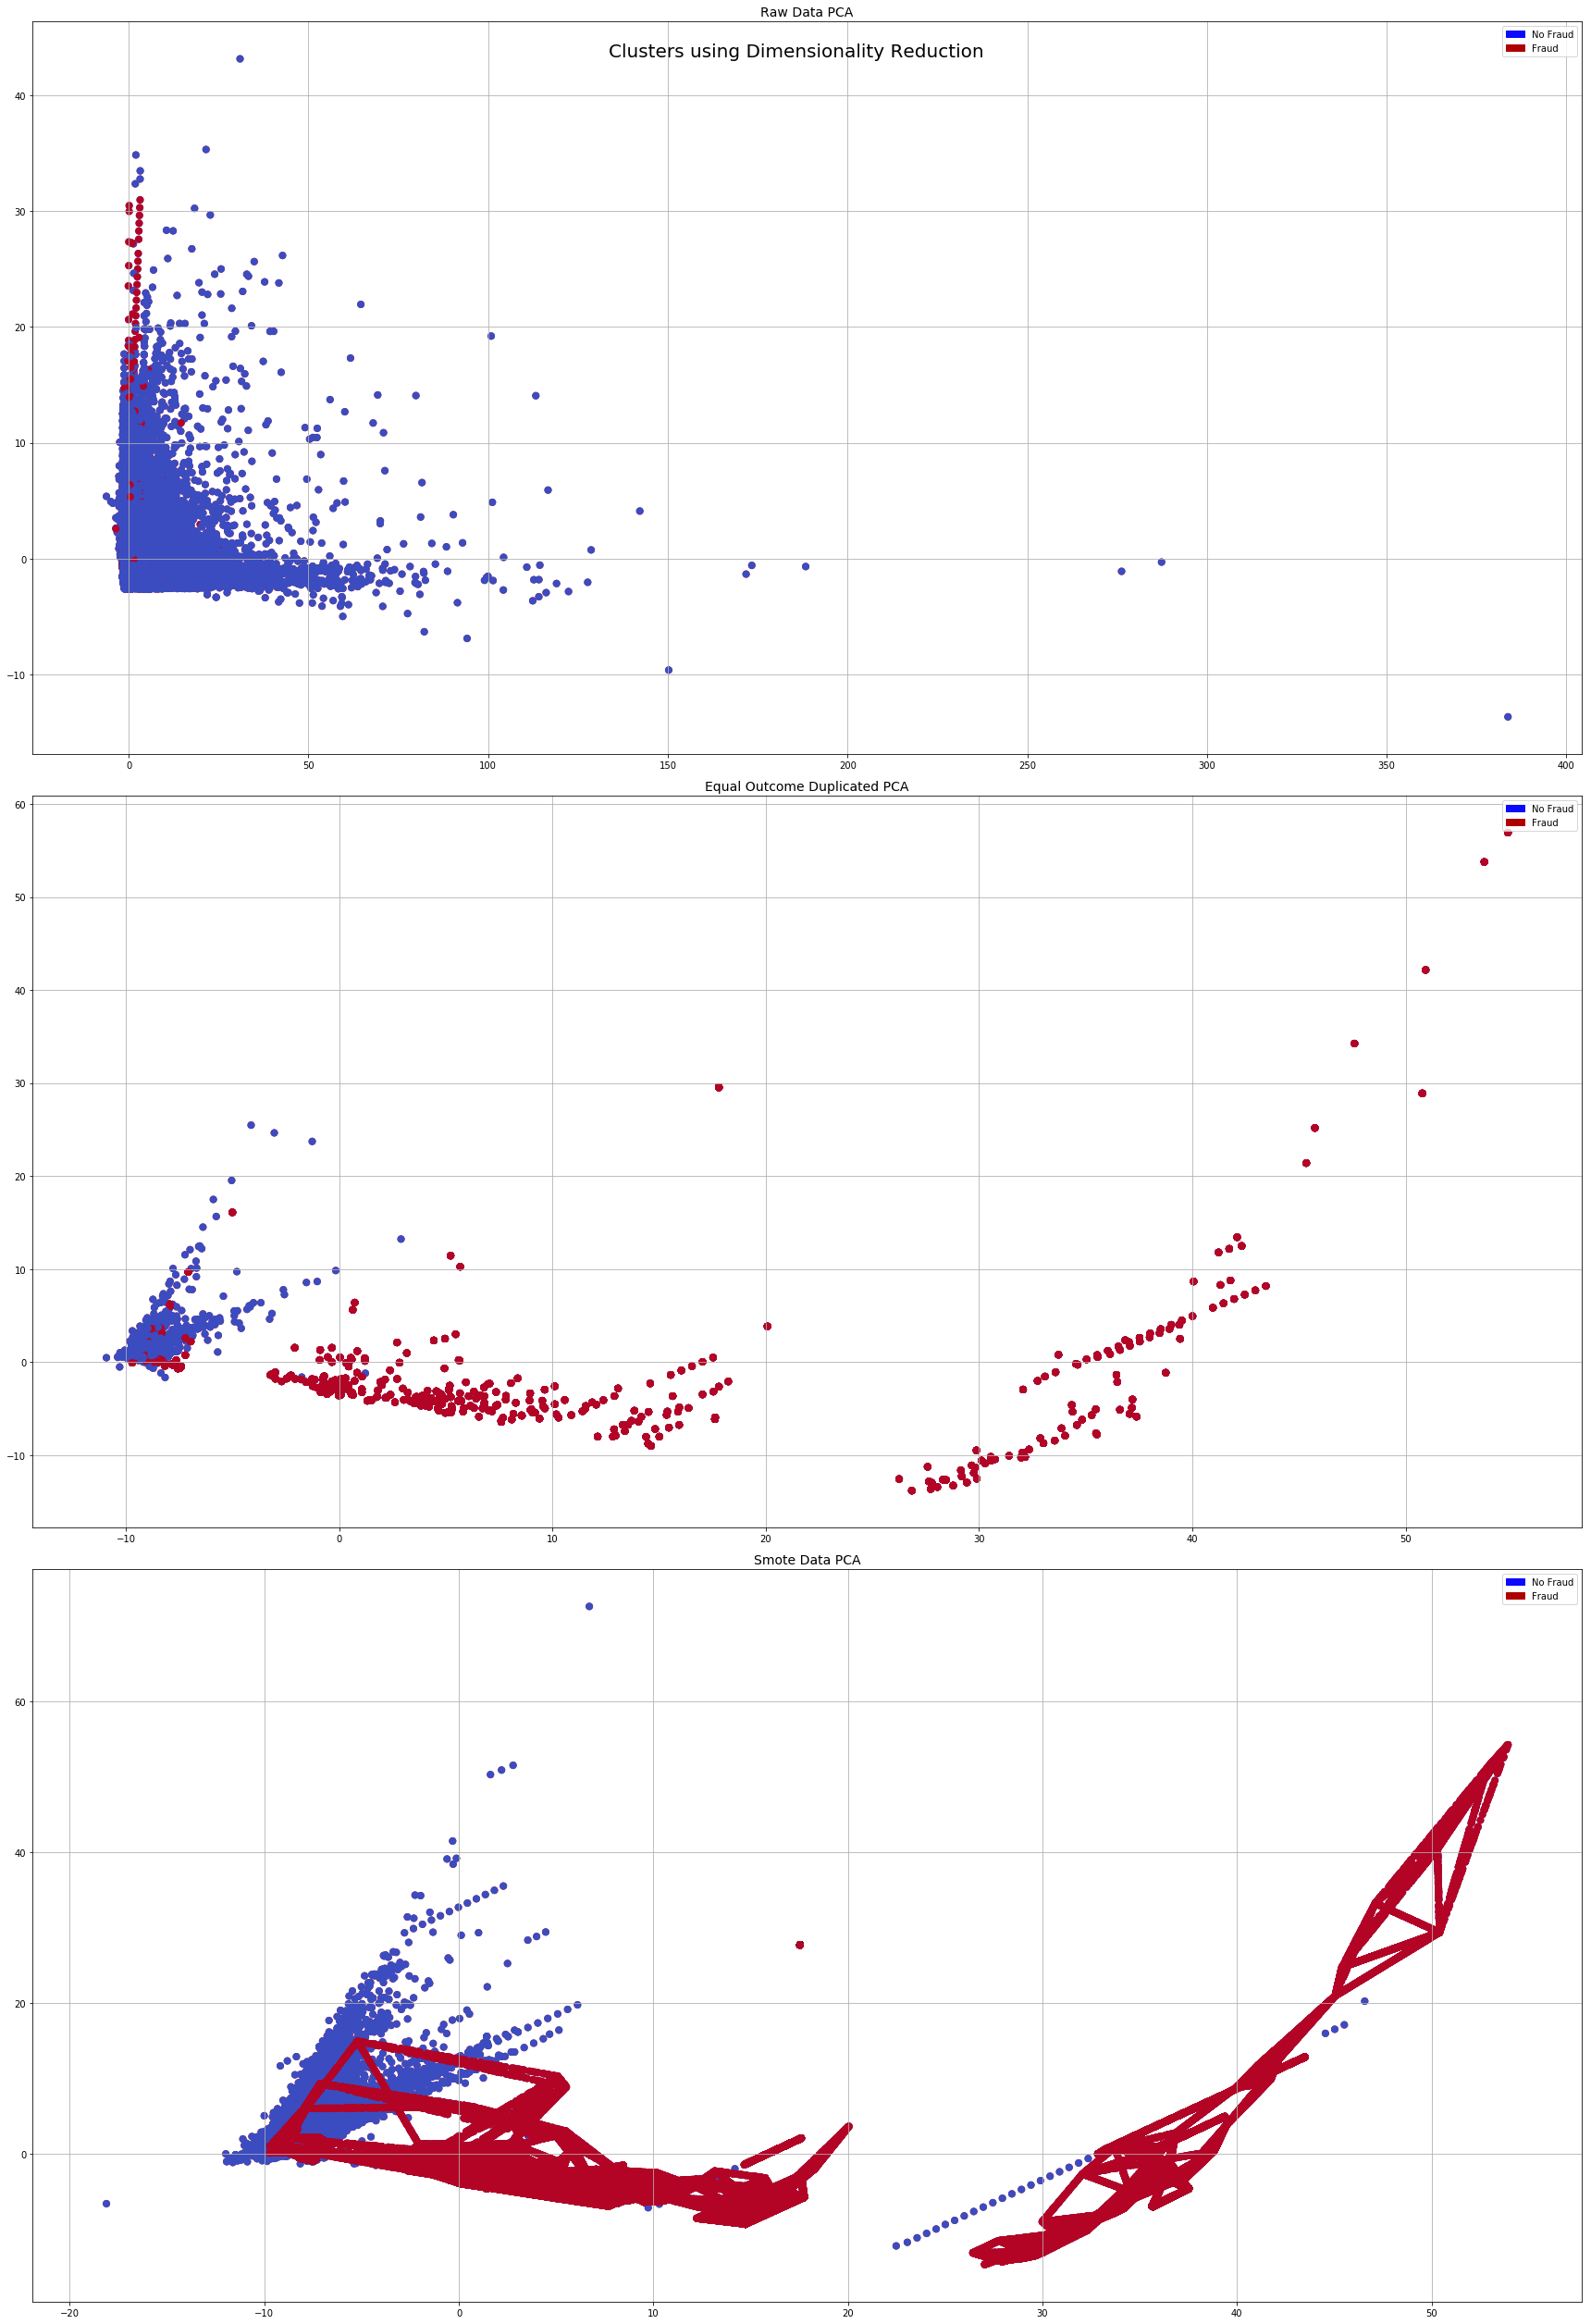

In [143]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(24,35))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=20)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# PCA scatter plot
ax1.scatter(X_data_PCA[:,0], X_data_PCA[:,1], c=(y_data == 0), 
            cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_data_PCA[:,0], X_data_PCA[:,1], c=(y_data == 1), 
            cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('Raw Data PCA', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_dup_data_PCA[:,0], X_dup_data_PCA[:,1], c=(y_dup_data == 0), 
            cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_dup_data_PCA[:,0], X_dup_data_PCA[:,1], c=(y_dup_data == 1), 
            cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('Equal Outcome Duplicated PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax3.scatter(X_smote_data_PCA[:,0], X_smote_data_PCA[:,1], c=(y_smote_data == 0), 
            cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_smote_data_PCA[:,0], X_smote_data_PCA[:,1], c=(y_smote_data == 1), 
            cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Smote Data PCA', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.tight_layout()
plt.show()

Both raw data and the duplicated data looks reasonably classifiable, the SMOTE data looks like it might struggle with the large overlap between classifications.


## 4: Machine Learning Classification

We can now begin modelling and predicting using the two processed datasets. We will begin by splitting the SMOTE dataset into train, test, validate subsets with proportions 60:20:20, we require a train/test/validate split in order to use a neural network implementation later, due to the large sample size of the SMOTE dataset this wont be a problem. For now we will only split the duplicated data into train and test in order to increase sample size.

In [144]:
X_dup_data = df_list[1].drop('Class', axis=1)
y_dup_data = df_list[1]['Class']

X_smote_data = df_list[2].drop('Class', axis=1)
y_smote_data = df_list[2]['Class']

X2_train, X2_test, y2_train, y2_test = train_test_split(X_dup_data, y_dup_data, test_size=0.2, random_state=42)

X3_train, X3_test, y3_train, y3_test = train_test_split(X_smote_data, y_smote_data, test_size=0.2, random_state=42)
X3_train, X3_val, y3_train, y3_val = train_test_split(X3_train, y3_train, test_size=0.25, random_state=42)


I didn't want to get bogged down testing 10+ models so I decided to stick with 5 commonly used and well documented methods.

1) Gaussian Naive Bayes - for a statistical approach

2) Logistic Regression - for pure mathematical approach

3) Random Forest - one flavour of a stepped approach 

4) Decision Tree - second flavour of a stepped approach

5) Nearest Neighbours - a geometric approach

I will delve deeper into logistic regression and K-Nearest Neighbours to test the effect of higher order correlations and optimal fitting parameters respectively.

In [145]:
#FOR EQUAL DUPLICATED DATA
gnb = GaussianNB()
model = gnb.fit(X2_train, y2_train)
prediction1 = model.predict(X2_test)
print('GaussianNB Accuracy: ', accuracy_score(y2_test, prediction1))

logmodel = LogisticRegression()
logmodel.fit(X2_train,y2_train)
prediction2 = logmodel.predict(X2_test)
print("LogReg Accuracy:",accuracy_score(y2_test, prediction2))

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X2_train, y2_train)
prediction3 = RF.predict(X2_test)
print("Random Forest Accuracy:",accuracy_score(y2_test, prediction3))

DTC = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
DTC.fit(X2_train, y2_train)
prediction4 = DTC.predict(X2_test)
print("Decision Tree Accuracy:",accuracy_score(y2_test, prediction4))

NearNeigh = neighbors.KNeighborsClassifier()
NearNeigh.fit(X2_train, y2_train)
prediction5 = NearNeigh.predict(X2_test)
print("Nearest Neighbour Accuracy:",accuracy_score(y2_test, prediction5))

GaussianNB Accuracy:  0.9232723577235772
LogReg Accuracy: 0.9471544715447154
Random Forest Accuracy: 0.9222560975609756
Decision Tree Accuracy: 0.9451219512195121
Nearest Neighbour Accuracy: 0.9852642276422764


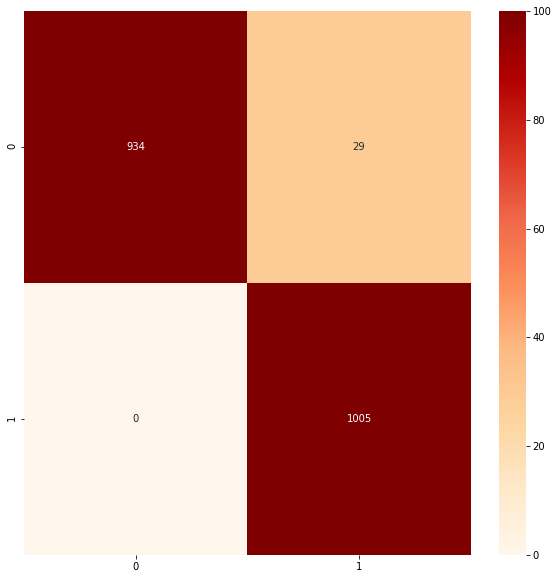

In [146]:

#Plotting Nearest Neighbour implementation
cm = confusion_matrix(y2_test, prediction5)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True, vmin = 0, vmax = 100, fmt = "d", cmap="OrRd", yticklabels=True)

For such a small dataset we get very acceptible results, particularly using the nearest neighbour algorithm. Without reading too much into the problem I would estimate that we are looking for very high accuracy above 99%. We have all fraudulent cases correctly classified which is better than an equal mix of incorrect classifications.

In [147]:
#FOR SMOTE DATA
gnb = GaussianNB()
model = gnb.fit(X3_train, y3_train)
prediction1 = model.predict(X3_test)
print('GaussianNB Accuracy: ', accuracy_score(y3_test, prediction1))

logmodel = LogisticRegression()
logmodel.fit(X3_train,y3_train)
prediction2 = logmodel.predict(X3_test)
print("LogReg Accuracy:",accuracy_score(y3_test, prediction2))

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X3_train, y3_train)
prediction3 = RF.predict(X3_test)
print("Random Forest Accuracy:",accuracy_score(y3_test, prediction3))

DTC = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
DTC.fit(X3_train, y3_train)
prediction4 = DTC.predict(X3_test)
print("Decision Tree Accuracy:",accuracy_score(y3_test, prediction4))

NearNeigh = neighbors.KNeighborsClassifier()
NearNeigh.fit(X3_train, y3_train)
prediction5 = NearNeigh.predict(X3_test)
print("Nearest Neighbour Accuracy:",accuracy_score(y3_test, prediction5))

GaussianNB Accuracy:  0.9137312487909537
LogReg Accuracy: 0.9493607442449395
Random Forest Accuracy: 0.9223924168615796
Decision Tree Accuracy: 0.9439442168017868
Nearest Neighbour Accuracy: 0.9987074195874295


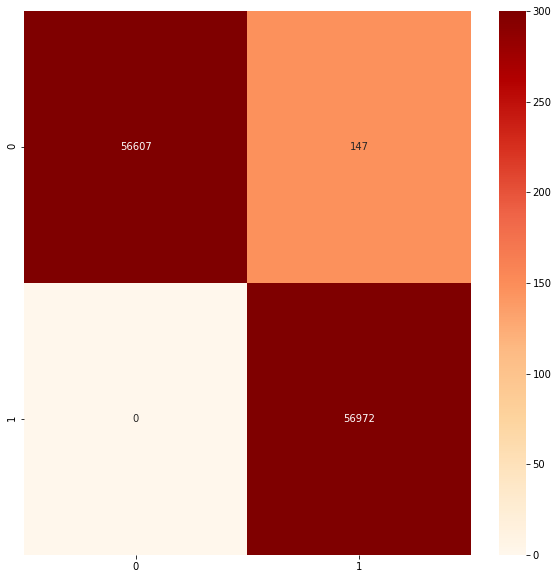

In [148]:
#Plotting Nearest Neighbour implementation
cm = confusion_matrix(y3_test, prediction5)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True, vmin = 0, vmax = 300, fmt = "d", cmap="OrRd", yticklabels=True)

The larger dataset produces even better results at 99.87% for KNN, we could stop here as the accuracy is very good. Considering around 40 million transactions occur per day, with our model you could expect around 50,000 incorrectly classified transactions needing attention. This isnt very sustainable in the long term and thats not even considering the real fraudulent transactions that also need attention.

Before moving on we can try a few more techniques to improve on the current models. We will consider optimal parameter fitting using GridSearchCV to optimise our KNN model and polynomial fitting to account for higher order correlations in our logistic regression model. Due to the added computational complexity of these methods depending on the success we will either apply these to the SMOTE dataset or decide to leave them out.

In [149]:
KNN_parameters = {'n_neighbors': [1,3,5,7],
                 'weights': ["uniform", "distance"],
                 'metric': ["euclidean", "manhattan"]}

KNN_model = neighbors.KNeighborsClassifier()

KNN_grid = GridSearchCV(KNN_model, KNN_parameters, verbose = 1, cv=5, n_jobs=-1)
KNN_grid.fit(X2_train, y2_train)

print("Best KNN parameters: ", KNN_grid.best_params_)

KNN_model_optimal = neighbors.KNeighborsClassifier(n_neighbors = KNN_grid.best_params_['n_neighbors'], 
                                                   weights = KNN_grid.best_params_['weights'], 
                                                   metric = KNN_grid.best_params_['metric'])
KNN_model_optimal.fit(X2_train, y2_train)

prediction6 = KNN_model_optimal.predict(X2_test)
print("Optimal KNN Accuracy:",accuracy_score(y2_test, prediction6))

print("Testing using polynomial features ---------------------------------------")

quad = PolynomialFeatures(2)

X2_train_quad = quad.fit_transform(X2_train)
X2_test_quad = quad.fit_transform(X2_test)

logmodel_quad = LogisticRegression()
logmodel_quad.fit(X2_train_quad, y2_train)
prediction7 = logmodel_quad.predict(X2_test_quad)
print("Optimal LogReg Quadratic Accuracy:",accuracy_score(y2_test, prediction7))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   29.8s finished


Best KNN parameters:  {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Optimal KNN Accuracy: 0.9933943089430894
Testing using polynomial features ---------------------------------------
Optimal LogReg Quadratic Accuracy: 0.9822154471544715


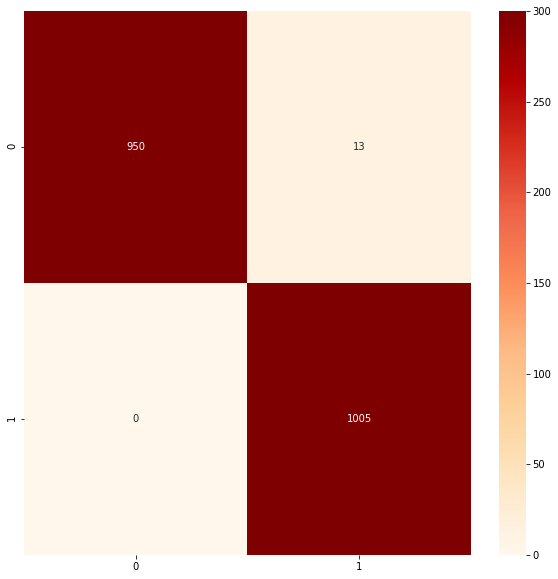

In [150]:
cm = confusion_matrix(y2_test, prediction6)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True, vmin = 0, vmax = 300, fmt = "d", cmap="OrRd", yticklabels=True)

KNN performs even better when optimised so we will run this on the SMOTE data below, though there is a significant increase in the logistic regression accuracy it's not enough to justify continuing this model as KNN performs so well.

In [151]:
KNN_model_optimal = neighbors.KNeighborsClassifier(n_neighbors = KNN_grid.best_params_['n_neighbors'], 
                                                   weights = KNN_grid.best_params_['weights'], 
                                                   metric = KNN_grid.best_params_['metric'])
KNN_model_optimal.fit(X3_train, y3_train)

prediction8 = KNN_model_optimal.predict(X3_test)
print("Optimal KNN Accuracy:",accuracy_score(y3_test, prediction8))

Optimal KNN Accuracy: 0.9995779329265075


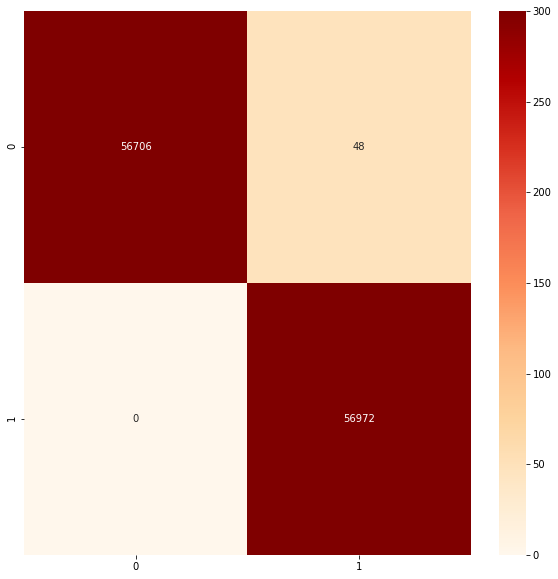

In [152]:
cm = confusion_matrix(y3_test, prediction8)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True, vmin = 0, vmax = 300, fmt = "d", cmap="OrRd", yticklabels=True)

Achieving 99.96% accuracy with optimized KNN is a great outcome, this would reduce the number of false positives per 40 million transactions to just ~17,000. With an automated banking system this could be sustainable.

The only thing to try now is a neural network model.

## Neural Network Classification

We will now try a neural network implementation using the keras library, This is a fairly simple implementation but with increasing numbers of perceptrons at each layer and a reasonable amount of dropout we should be able to model and generalize to the data well.

In [179]:
model = Sequential()

model.add(Dense(64, input_dim=30, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.25))

model.add(Dense(128, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))

model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))

model.add(Dense(128, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# Compile the model
model.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.8, 
                                            min_lr=0.0000001)
#Increase epochs to increase final accuracy, increases compute time vastly!
epochs = 100 
batch_size = 86
Wsave = model.get_weights()

In [180]:
#Split the duplicated data for training with the neural net.
X2_train, X2_val, y2_train, y2_val = train_test_split(X_dup_data, y_dup_data, test_size=0.25, random_state=42)

history = model.fit(X2_train, y2_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X2_val, y2_val), callbacks=[learning_rate_reduction])

Train on 7380 samples, validate on 2460 samples
Epoch 1/100
7380/7380 [==============================] - 1s 149us/step - loss: 0.1912 - acc: 0.9225 - val_loss: 0.1033 - val_acc: 0.9565
Epoch 2/100
7380/7380 [==============================] - 0s 61us/step - loss: 0.1081 - acc: 0.9584 - val_loss: 0.0692 - val_acc: 0.9736
Epoch 3/100
7380/7380 [==============================] - 0s 60us/step - loss: 0.0758 - acc: 0.9686 - val_loss: 0.0525 - val_acc: 0.9793
Epoch 4/100
7380/7380 [==============================] - 0s 57us/step - loss: 0.0599 - acc: 0.9808 - val_loss: 0.0428 - val_acc: 0.9854
Epoch 5/100
7380/7380 [==============================] - 0s 57us/step - loss: 0.0414 - acc: 0.9852 - val_loss: 0.0402 - val_acc: 0.9854
Epoch 6/100
7380/7380 [==============================] - 0s 57us/step - loss: 0.0353 - acc: 0.9886 - val_loss: 0.0411 - val_acc: 0.9902
Epoch 7/100
7380/7380 [==============================] - 0s 57us/step - loss: 0.0319 - acc: 0.9904 - val_loss: 0.0367 - val_acc: 0.9874

7380/7380 [==============================] - 0s 60us/step - loss: 0.0050 - acc: 0.9993 - val_loss: 0.0828 - val_acc: 0.9927
Epoch 54/100
7380/7380 [==============================] - 0s 65us/step - loss: 0.0053 - acc: 0.9993 - val_loss: 0.0826 - val_acc: 0.9927

Epoch 00054: ReduceLROnPlateau reducing learning rate to 5.497558740898967e-05.
Epoch 55/100
7380/7380 [==============================] - 1s 71us/step - loss: 0.0054 - acc: 0.9991 - val_loss: 0.0817 - val_acc: 0.9931
Epoch 56/100
7380/7380 [==============================] - 0s 67us/step - loss: 0.0057 - acc: 0.9995 - val_loss: 0.0790 - val_acc: 0.9931
Epoch 57/100
7380/7380 [==============================] - 0s 61us/step - loss: 0.0085 - acc: 0.9991 - val_loss: 0.0753 - val_acc: 0.9935

Epoch 00057: ReduceLROnPlateau reducing learning rate to 4.398046876303852e-05.
Epoch 58/100
7380/7380 [==============================] - 0s 59us/step - loss: 0.0062 - acc: 0.9995 - val_loss: 0.0812 - val_acc: 0.9927
Epoch 59/100
7380/7380 [=====

0.9913617886178862


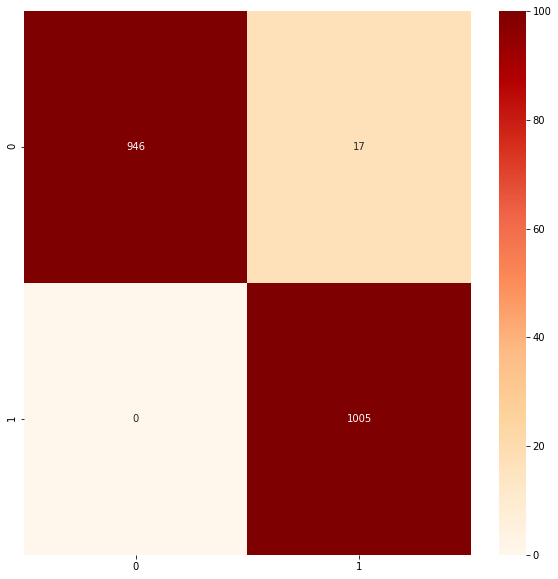

In [181]:
predictionNN2 = model.predict(X2_test)
predictionNN2 = (predictionNN2 > 0.5).astype(np.int)
score2 = accuracy_score(y2_test, predictionNN2)
print(score2)

cm = confusion_matrix(y2_test, predictionNN2)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True, vmin = 0, vmax = 100, fmt = "d", cmap="OrRd", yticklabels=True)

In [182]:
#Reset the model to fit to the SMOTE data.
model.set_weights(Wsave)

In [183]:
history = model.fit(X3_train, y3_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X3_val, y3_val), callbacks=[learning_rate_reduction])

Train on 341178 samples, validate on 113726 samples
Epoch 1/100
341178/341178 [==============================] - 20s 57us/step - loss: 0.4659 - acc: 0.7357 - val_loss: 0.2837 - val_acc: 0.9242
Epoch 2/100
341178/341178 [==============================] - 21s 63us/step - loss: 0.2311 - acc: 0.9229 - val_loss: 0.1624 - val_acc: 0.9367
Epoch 3/100
341178/341178 [==============================] - 21s 60us/step - loss: 0.1683 - acc: 0.9356 - val_loss: 0.1387 - val_acc: 0.9452
Epoch 4/100
341178/341178 [==============================] - 22s 64us/step - loss: 0.1493 - acc: 0.9418 - val_loss: 0.1245 - val_acc: 0.9512
Epoch 5/100
341178/341178 [==============================] - 23s 66us/step - loss: 0.1375 - acc: 0.9463 - val_loss: 0.1146 - val_acc: 0.9543
Epoch 6/100
341178/341178 [==============================] - 20s 59us/step - loss: 0.1289 - acc: 0.9495 - val_loss: 0.1065 - val_acc: 0.9572
Epoch 7/100
341178/341178 [==============================] - 19s 57us/step - loss: 0.1214 - acc: 0.952

341178/341178 [==============================] - 20s 60us/step - loss: 0.0276 - acc: 0.9914 - val_loss: 0.0180 - val_acc: 0.9948
Epoch 59/100
341178/341178 [==============================] - 20s 58us/step - loss: 0.0269 - acc: 0.9915 - val_loss: 0.0174 - val_acc: 0.9950
Epoch 60/100
341178/341178 [==============================] - 20s 58us/step - loss: 0.0267 - acc: 0.9917 - val_loss: 0.0173 - val_acc: 0.9951
Epoch 61/100
341178/341178 [==============================] - 19s 57us/step - loss: 0.0265 - acc: 0.9916 - val_loss: 0.0170 - val_acc: 0.9952
Epoch 62/100
341178/341178 [==============================] - 20s 58us/step - loss: 0.0263 - acc: 0.9917 - val_loss: 0.0172 - val_acc: 0.9951
Epoch 63/100
341178/341178 [==============================] - 19s 57us/step - loss: 0.0255 - acc: 0.9922 - val_loss: 0.0164 - val_acc: 0.9954
Epoch 64/100
341178/341178 [==============================] - 20s 59us/step - loss: 0.0252 - acc: 0.9923 - val_loss: 0.0163 - val_acc: 0.9954
Epoch 65/100
341178

0.9969839790373354


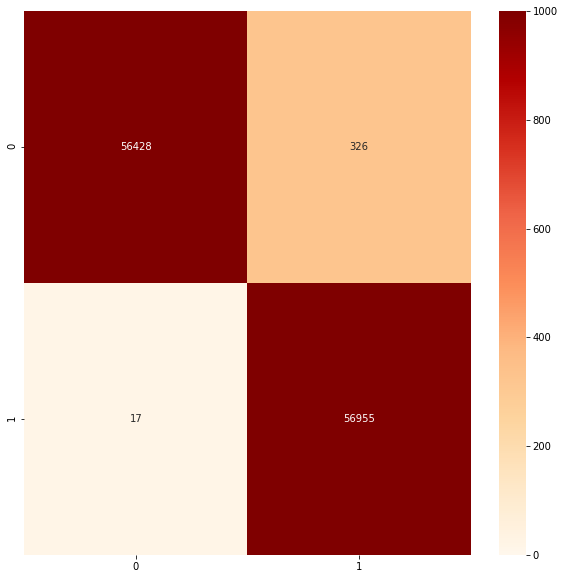

In [184]:
predictionNN3 = model.predict(X3_test)
predictionNN3 = (predictionNN3 > 0.5).astype(np.int)
score3 = accuracy_score(y3_test, predictionNN3)
print(score3)

cm = confusion_matrix(y3_test, predictionNN3)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True, vmin = 0, vmax = 1000, fmt = "d", cmap="OrRd", yticklabels=True)

### Conclusion
Given the methods tried here the clear winner is a K-Nearest-Neighbours algorithm ran on a dataset with artifically produced fraudulent datapoints using SMOTE.

This notebook could be taken further by considering the following:

Neural net training on 2nd order transformed dataset.

A more sophisticated neural network design.

Further optimisation of different machine learning methods such as the ones tried above.

For now I will be leaving this notebook but may come back to it in the future to try these new directions out.